In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier, LGBMRegressor
import sklearn

In [2]:
# laoding the structured train and test data for csv into pandas dataframe
struct_train_df = pd.read_csv(r"D:\Downloads\Datasets\ResumeClassifier_Piramal\train.csv", encoding='ISO-8859-1')
struct_test_df = pd.read_csv(r"D:\Downloads\Datasets\ResumeClassifier_Piramal\test.csv", encoding='ISO-8859-1')

In [3]:
def save_dataset(dataset , name):
    dataset.to_csv(f"{name}.csv", index  = False)
    dataset.to_excel(f'{name}.xlsx', index=False)
    dataset.to_pickle(f'{name}.pkl')

In [4]:
struct_train_df.head()

CandidateID Designation Have you Completed your Graduation ?  \
0     EMP0001         DST                            Full Time   
1     EMP0002         DST                            Full Time   
2     EMP0004         DST                            Full Time   
3     EMP0005         DST                            Full Time   
4     EMP0006         DST                            Full Time   

  Highest Educational Qualification  \
0                     Post Graduate   
1                          Graduate   
2                          Graduate   
3                     Post Graduate   
4                     Post Graduate   

   Total no of years Experience [before joining Piramal]  \
0                                                4.0       
1                                                8.0       
2                                                5.0       
3                                                5.5       
4                                                1.0       

  Previous Industry worked with [before joining Piramal]  \
0                                             others       
1                                               NBFC       
2                                               NBFC       
3                                            Banking       
4                                             others       

  Name of your Previous Organization / Company  \
0                          Innovative Solution   
1                     Altum credo home finance   
2                     Kogta financial services   
3                                AXIS BANK LTD   
4                                 Soni finance   

  How many Organization that you have worked before joining Piramal Finance ?  \
0                                             01-Feb                            
1                                             03-May                            
2                                             01-Feb                            
3                                             01-Feb                            
4                                        0 / Fresher                            

  Average Incentive [per month] earned in your pervious company ?  \
0                                              3K-7K                
1                                             7K-10K                
2                                          Above 10K                
3                                             7K-10K                
4                                                Nil                

  How did you come to know about the role at Piramal Finance ?  ...  \
0                                           Referral            ...   
1                                           Referral            ...   
2                                             others            ...   
3                              Consultant / Partners            ...   
4                                           Referral            ...   

  What was the average ticket size handled at your end in previous role ?  \
0                                            Fresher                        
1                                   INR 5L - INR 15L                        
2                                  INR 15L and above                        
3                                  INR 15L and above                        
4                                   INR 50K - INR 2L                        

  How many members are there in your family ?  \
0                               3 - 4 members   
1                           5 & Above members   
2                               3 - 4 members   
3                               1 - 2 members   
4                               3 - 4 members   

  How many are earning family members ? [Other then yourself]2  \
0                                                1.0             
1                                                0.0             
2                                                1.0          

In [5]:
struct_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 21 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   CandidateID                                                                  743 non-null    object 
 1   Designation                                                                  743 non-null    object 
 2   Have you Completed your Graduation ?                                         642 non-null    object 
 3   Highest Educational Qualification                                            642 non-null    object 
 4   Total no of years Experience [before joining Piramal]                        669 non-null    float64
 5   Previous Industry worked with [before joining Piramal]                       743 non-null    object 
 6   Name of your Previous Organization / Compa

In [6]:
struct_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 20 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   CandidateID                                                                  187 non-null    object 
 1   Designation                                                                  187 non-null    object 
 2   Have you Completed your Graduation ?                                         167 non-null    object 
 3   Highest Educational Qualification                                            167 non-null    object 
 4   Total no of years Experience [before joining Piramal]                        175 non-null    float64
 5   Previous Industry worked with [before joining Piramal]                       187 non-null    object 
 6   Name of your Previous Organization / Compa

In [7]:
column_name_alias = {
        'CandidateID': 'CandidateID', 
        'Designation': 'Designation', 
        'Have you Completed your Graduation ?' : "Graduation",
        'Highest Educational Qualification': "Qualification",
        'Total no of years Experience [before joining Piramal]' : "YoExperience",
        'Previous Industry worked with [before joining Piramal]' : "Prev_Industry" ,
        'Name of your Previous Organization / Company': "Prev_Org",
        'How many Organization that you have worked before joining Piramal Finance ?': "No_of_Pre_Org",
        'Average Incentive [per month] earned in your pervious company ?' : "Avg_Incentive",
        'How did you come to know about the role at Piramal Finance ?': "Referral_Source" ,
        'Which Products you are selling in your pervious role ?': "Prev_Org_Prod" ,
        'What was the average ticket size handled at your end in previous role ?' : "Prev_Avg_ticket_size",
        'How many members are there in your family ?': "Family_size",
        'How many are earning family members ? [Other then yourself]2' : "Earning_Count",
        'How many members are dependent on you ?' : "Dependent_Count",
        'Department': 'Department', 
        'DOJ' : 'DOJ',
        'Location Code' : 'Location_Code' , 
        'Residential Pincode' : 'Residential_Pincode', 
        'Branch Pincode' : 'Branch_Pincode',
    }

In [8]:
# renaming the columns to more concise and understandable format
# method 1: df.columns  = new list of column name with same order as original
# method 2L: df=df.rename( colummns = dictionary corresponding from old names to new name ) , better suited for changing names of sepcific columns
# method 3: df=pd.DataFrame(df, columns = new list names)

In [9]:
struct_train_df = struct_train_df.rename(columns = column_name_alias)
struct_test_df = struct_test_df.rename(columns = column_name_alias)

In [10]:
struct_train_df.drop(["Performance"], axis = 1).describe()

YoExperience  Earning_Count  Dependent_Count  Location_Code  \
count  6.690000e+02     561.000000       743.000000     743.000000   
mean   4.638996e+04    6304.691622         2.570659    5915.991925   
std    1.199767e+06   49050.643425         1.446271    1006.890874   
min    0.000000e+00       0.000000         0.000000    2050.000000   
25%    2.000000e+00       1.000000         2.000000    6040.000000   
50%    4.000000e+00       1.000000         2.000000    6141.000000   
75%    6.000000e+00       2.000000         3.000000    6292.000000   
max    3.103202e+07  600000.000000        10.000000    6525.000000   

       Residential_Pincode  Branch_Pincode  
count           743.000000      741.000000  
mean         443191.475101   440851.477733  
std          188195.116059   188326.668332  
min          101213.000000   110019.000000  
25%          274329.000000   273001.000000  
50%          500007.000000   500014.000000  
75%          605002.000000   602001.000000  
max          847224.000000   842002.000000

In [11]:
struct_test_df.describe()

YoExperience  Earning_Count  Dependent_Count  Location_Code  \
count    175.000000     144.000000       187.000000     185.000000   
mean       4.521381    1702.555556         2.593583    6026.448649   
std        4.267907   16851.384165         1.423898     779.988182   
min        0.000000       0.000000         0.000000    2088.000000   
25%        2.000000       1.000000         2.000000    6046.000000   
50%        3.800000       1.000000         3.000000    6149.000000   
75%        6.000000       2.000000         4.000000    6278.000000   
max       40.000000  200000.000000         7.000000    6525.000000   

       Residential_Pincode  Branch_Pincode  
count           187.000000      185.000000  
mean         466455.705882   462538.405405  
std          192194.097207   189673.549213  
min               0.000000   110019.000000  
25%          360507.500000   334001.000000  
50%          504110.000000   500072.000000  
75%          618702.000000   612001.000000  
max          842001.000000   842002.000000

It can be observed that YoE (years of Experience) , Earning_members have some outliers both in train as well as test dataset \
Also  since the training examples are few ( 743 ) we will avoid removing records \
We will remove the outliers before data imputation or will fill nan value with it \
We will use the box plot and IOR method to identify outliers

 Percentage positive Performance : 39.43472409152086
Data is mildly imbalanced. 


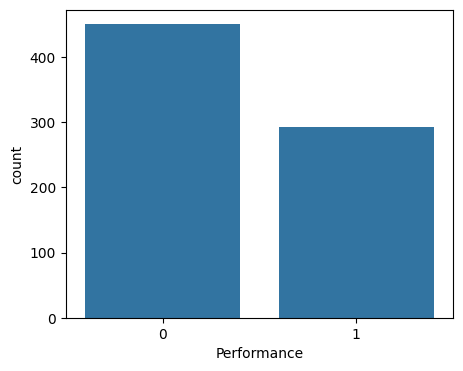

In [12]:
print(f" Percentage positive Performance : {struct_train_df['Performance'].mean()*100}")
plt.figure(figsize=(5,4))
sns.countplot(data= struct_train_df, x = "Performance")
print("Data is mildly imbalanced. ")
plt.show()


In [13]:
print(f"Number of NaN values in train dataset :  {struct_train_df.isna().sum()}")
print(f"Number of NaN values in test dataset :  {struct_test_df.isna().sum()}")

Number of NaN values in train dataset :  CandidateID               0
Designation               0
Graduation              101
Qualification           101
YoExperience             74
Prev_Industry             0
Prev_Org                192
No_of_Pre_Org            74
Avg_Incentive             0
Referral_Source           0
Prev_Org_Prod             6
Prev_Avg_ticket_size      0
Family_size               0
Earning_Count           182
Dependent_Count           0
Department                0
DOJ                       0
Location_Code             0
Residential_Pincode       0
Branch_Pincode            2
Performance               0
dtype: int64
Number of NaN values in test dataset :  CandidateID              0
Designation              0
Graduation              20
Qualification           20
YoExperience            12
Prev_Industry            0
Prev_Org                43
No_of_Pre_Org           12
Avg_Incentive            0
Referral_Source          0
Prev_Org_Prod            4
Prev_Avg_ticket_size 

In [14]:
# assigning the target Y as Performance column of structured train data
train_label = struct_train_df["Performance"]
# removing the performance column from structured data and store in X dataset
struct_train_df_X = struct_train_df.drop(["Performance"], axis =1)

In [15]:
# combining the train and test dataset for simultaneous preprocessing
print(f"The shape of Train Examples : {struct_train_df_X.shape}")
print(f"The shape of Test Examples : {struct_test_df.shape}")
combined_struct_data = pd.concat([struct_train_df_X, struct_test_df], axis = 0)
combined_struct_data.reset_index(inplace= True)
combined_struct_data.drop("index", inplace = True,axis=1)
combined_struct_data.head()

The shape of Train Examples : (743, 20)
The shape of Test Examples : (187, 20)


CandidateID Designation Graduation  Qualification  YoExperience  \
0     EMP0001         DST  Full Time  Post Graduate           4.0   
1     EMP0002         DST  Full Time       Graduate           8.0   
2     EMP0004         DST  Full Time       Graduate           5.0   
3     EMP0005         DST  Full Time  Post Graduate           5.5   
4     EMP0006         DST  Full Time  Post Graduate           1.0   

  Prev_Industry                  Prev_Org No_of_Pre_Org Avg_Incentive  \
0        others       Innovative Solution        01-Feb         3K-7K   
1          NBFC  Altum credo home finance        03-May        7K-10K   
2          NBFC  Kogta financial services        01-Feb     Above 10K   
3       Banking             AXIS BANK LTD        01-Feb        7K-10K   
4        others              Soni finance   0 / Fresher           Nil   

         Referral_Source                     Prev_Org_Prod  \
0               Referral                           Others;   
1               Referral   Housing Loans;MSME / SME Loans;   
2                 others  MSME / SME Loans;Personal Loans;   
3  Consultant / Partners                 MSME / SME Loans;   
4               Referral                    Housing Loans;   

  Prev_Avg_ticket_size        Family_size  Earning_Count  Dependent_Count  \
0              Fresher      3 - 4 members            1.0                2   
1     INR 5L - INR 15L  5 & Above members            0.0                4   
2    INR 15L and above      3 - 4 members            1.0                4   
3    INR 15L and above      1 - 2 members            0.0                2   
4     INR 50K - INR 2L      3 - 4 members            1.0                1   

              Department         DOJ  Location_Code  Residential_Pincode  \
0     Affordable Housing  30-03-2023         6298.0               221715   
1         Budget Housing  02-02-2023         6048.0               620001   
2  Secured Business Loan  29-12-2021         6181.0               414001   
3     Affordable Housing  01-08-2022         6330.0               622504   
4     Affordable Housing  12-12-2022         6374.0               323001   

   Branch_Pincode  
0        110076.0  
1        620001.0  
2        414001.0  
3        622001.0  
4        323001.0

In [16]:
# after renaming the columns 
# we can analyze individual columns, their data type , unique values , comvert them in more consistant format


In [17]:
combined_struct_data["DOJ"]=combined_struct_data["DOJ"].str.slice(3)

In [18]:
combined_struct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CandidateID           930 non-null    object 
 1   Designation           930 non-null    object 
 2   Graduation            809 non-null    object 
 3   Qualification         809 non-null    object 
 4   YoExperience          844 non-null    float64
 5   Prev_Industry         930 non-null    object 
 6   Prev_Org              695 non-null    object 
 7   No_of_Pre_Org         844 non-null    object 
 8   Avg_Incentive         930 non-null    object 
 9   Referral_Source       930 non-null    object 
 10  Prev_Org_Prod         920 non-null    object 
 11  Prev_Avg_ticket_size  930 non-null    object 
 12  Family_size           930 non-null    object 
 13  Earning_Count         705 non-null    float64
 14  Dependent_Count       930 non-null    int64  
 15  Department            9

In [19]:
# it can be seen that the datatype is inconsistent with the type of column
# as example : No_of_prev_org , avg_incentive, Prev_Avg_ticket_size, Family_size : these all columns seems numerical type or can be converted into numerical type 
# for easier analysis 
# the categorical values include : Designation, Graduation, Prev_Industry, Prev_Org, Referral_source, Prev_Org_Prod, Department


In [20]:
# column : CnadidateID 
# a simple column acting as primary key for each candidate applying for the job 
# it is important that it should be unique i.e. count of unique values must equal no of rows in dataset
combined_struct_data["CandidateID"].nunique() == combined_struct_data.shape[0]
# thus it acts as primary key

True

In [21]:
# Now considering all the columns that could be converted to numerical types
numerical_columns =  [
    "YoExperience",
    "No_of_Pre_Org",
    "Avg_Incentive",
    "Prev_Avg_ticket_size",
    "Family_size",
    "Earning_Count",
    "Dependent_Count",
]

In [22]:
# column : No_of_Prev_org , 'How many Organization that you have worked before joining Piramal Finance ?'
print(f"ALl the unique values in Column No_of_Prev_Org : {combined_struct_data['No_of_Pre_Org'].unique()}")
print(f"Number of times each value appeared : {combined_struct_data['No_of_Pre_Org'].value_counts()}")

ALl the unique values in Column No_of_Prev_Org : ['01-Feb' '03-May' '0 / Fresher' '5+' nan 'a']
Number of times each value appeared : No_of_Pre_Org
01-Feb         400
03-May         258
0 / Fresher    127
5+              58
a                1
Name: count, dtype: int64


In [23]:
# column: Avg_Incentive 
incentive_values = combined_struct_data["Avg_Incentive"].unique()
# ['3K-7K', '7K-10K', 'Above 10K', 'Nil', 'Less than 3K']
incentives = [ 5000.0, 8500.0, 11500.0, 0.0, 1500.0]

incentive_mapping = dict(zip(incentive_values, incentives))


# for idx, incentive in enumerate(incentive_values):
#     combined_struct_data.loc[combined_struct_data['Avg_Incentive']==incentive , "Avg_Incentive"] = incentives[idx]

combined_struct_data['Avg_Incentive']=combined_struct_data["Avg_Incentive"].map( incentive_mapping)

# Print results
print(f"Uniques values in Avg_Incentive Columns : {incentive_values}, {len(incentive_values)}")
print(f"New values assigned : {combined_struct_data['Avg_Incentive'].unique()}")


Uniques values in Avg_Incentive Columns : ['3K-7K' '7K-10K' 'Above 10K' 'Nil' 'Less than 3K'], 5
New values assigned : [ 5000.  8500. 11500.     0.  1500.]


In [24]:
# column: Pre_Avg_Ticket_size
ticket_values = combined_struct_data["Prev_Avg_ticket_size"].unique()
# ['Fresher', 'INR 5L - INR 15L', 'INR 15L and above', 'INR 50K - INR 2L', 'Â\xa0INR 2L - INR 5L', 'INR 50K and below', 'INR 10L and above', 'INR 5L - INR 10L', 'åÊINR 2L - INR 5L']
ticket_sizes = [ 0.0, 1000000.0, 1700000.0, 125000.0, 350000.0, 25000.0, 1250000.0, 750000.0, 350000.0 ]

ticket_mapping = dict(zip(ticket_values, ticket_sizes))

# for idx, incentive in enumerate(incentive_values):
#     combined_struct_data.loc[combined_struct_data['Avg_Incentive']==incentive , "Avg_Incentive"] = incentives[idx]


combined_struct_data['Prev_Avg_ticket_size']=combined_struct_data["Prev_Avg_ticket_size"].map( ticket_mapping)

# Print results
print(f"Uniques values in Prev_Avg_ticket_size Columns : {ticket_values}, {len(ticket_values)}")
print(f"New values assigned : {combined_struct_data['Prev_Avg_ticket_size'].unique()}")

Uniques values in Prev_Avg_ticket_size Columns : ['Fresher' 'INR 5L - INR 15L' 'INR 15L and above' 'INR 50K - INR 2L'
 'Â\xa0INR 2L - INR 5L' 'INR 50K and below' 'INR 10L and above'
 'INR 5L - INR 10L' 'åÊINR 2L - INR 5L'], 9
New values assigned : [      0. 1000000. 1700000.  125000.  350000.   25000. 1250000.  750000.]


In [25]:
# column: Pre_Avg_Ticket_size
family_values = combined_struct_data["Family_size"].unique()
# ['3 - 4 members', '5 & Above members', '1 - 2 members', '5 & above members']
family_sizes = [ 4.0, 6.0, 2.0, 6.0 ]

family_mapping = dict(zip(family_values, family_sizes))

# for idx, incentive in enumerate(incentive_values):
# combined_struct_data.loc[combined_struct_data['Avg_Incentive']==incentive , "Avg_Incentive"] = incentives[idx]


combined_struct_data['Family_size']=combined_struct_data["Family_size"].map( family_mapping)

# Print results
print(f"Uniques values in Family_size Columns : {family_values}, {len(family_values)}")
print(f"New values assigned : {combined_struct_data['Family_size'].unique()}")

Uniques values in Family_size Columns : ['3 - 4 members' '5 & Above members' '1 - 2 members' '5 & above members'], 4
New values assigned : [4. 6. 2.]


In [26]:
categorical_columns = [
    "Designation", "Graduation", "Qualification", "Prev_Industry", "Prev_Org", "Referral_Source", "Prev_Org_Prod", "Department"
]

In [27]:
combined_struct_data[categorical_columns]=combined_struct_data[categorical_columns].apply( lambda x : x.str.lower().str.strip())

In [28]:
combined_struct_data["Prev_Org"].isna().sum()

235

In [29]:
org_mapping_dict= {

 'NONE':['0', 'fresher', 'nill', 'nil', 'na', 'no'],
 'aadhar_housing': ['aadhar housing', 'aadhar housing finance', 'aadhar housing finance limited', 'aadhar housing finance ltd','adhar housing financial'],
 'aavas_finance': [ 'aavas finance limited','aavas financer limited', 'aavas financiars ltd', 'aavas financiers', 'aavas finenciers ltd', 'aavas housing finance ltd', 'avas'],
 'ab_capital': ['aditya birla capital and housing finance','aditya birla capital finance', 'aditya birla finance', 'aditya birla housing capital', 'aditya birla housing finance', 'aditya birla housing finance ltd', 'aditya birla shared services limited'],
 'altum_finance': ['altum credo home finance','altum credo home finance pvt. ltd'],
 'andromeda': ['andrameda large loan distribution pvt ltd.'],
 'aptus': [ 'aptus value housing finance', 'aptus value housing finance limited'],
 'au_bank': ['au small finance bank','au small finance company ltd'],
 'axis_bank': ['axis bank','axis bank behalf of quess corp limited', 'axis bank limited', 'axis bank ltd', 'axis bank ltd.', 'axis bank pvt ltd'],
 'aye_finance': ['aye finance', 'aye finance pvt ltd'],
 'bajafinserv': ['bajafinserv company ltd','bajaj auto finance', 'bajaj finaerv', 'bajaj finance', 'bajaj finance limited', 'bajaj finance ltd', 'bajaj finserv', 'bajaj finserv ltd', 'bajaj finserv private limited', 'bajaj finserve', 'bajaj housing finance', 'bajajfinance'],
 'bandhan_bank': ['bandhan bank','bandhan bank micro finance', 'bandhan bank private limited'],
 'bharat_limited': ['bharat finance inclusion limited','bharat financial inclusion limited', 'bharat financial inclusion ltd'],
 'airtel': ['bharti airtel ltd', 'ani technology ola kabs pvt ltd and air tel cheque book finance', 'bharti airtel pvt ltd'],
 'cars24': ['cars 24','cars24 financial service pvt ltd'],
 'cholamandalam': [ 'cholamandalam finance','chola mandalam', 'chola','cholamandalam investment and finance co ltd', 'cholamandalam investment and finance com ltd', 'cholamandalam investment and finance company', 'cholamandalam investment and finance company limited', 'cholamandalam investment and finance limited','cholamandlam investment and finance company limited'],
 'credit_limited': [ 'credit access gramin limited', 'credit access gramin ltd'],
 'dbs_bank': [ 'dbs bank', 'dbs bank india lid','dbs bank india pvt ltd', 'dbs bank ltd'],
 'dewan_finance': [ 'dewan housing finance corporation ltd', 'dewan housing finance corporation ltd.'],
 'edelweiss housing finance ltd': ['edelweiss tokio life insurance company ltd'],
 'equitas_bank': ['equitas bank', 'equitas small finace bank', 'equitas small finance bank'],
 'esaf': [ 'esaf cooperative', 'esaf small finance bank'],
 'five_star_ltd':[ 'five star finance limited', 'five-star business finance limited'],
 'fullarton_ltd': [ 'fullarton india credit company ltd','fullerton india credit company ltd', 'fullerton india home finance'],
 'growth_ltd': [ 'growth souce financial technology pvt ltd','growth source financial technology pvt ltd'],
 'hdb': ['hdb finacial services', 'hdb finance', 'hdb finance service', 'hdb finance service ltd', 'hdb finance services', 'hdb finance services limited', 'hdb finance services ltd', 'hdb finance, muthoot microfinance', 'hdb financial service limited', 'hdb financial services', 'hdb financial services limited', 'hdb financial services ltd', 'hdb financial services pvt ltd', 'hdb financial services undr hdfc bank', 'hdb financial servies pvt ltd', 'hdb financial servisess', 'hdb finencel sevices ltd'],
 'hdfc': ['hdfc bank', 'hdfc bank ltd', 'hdfc bank ltd ( hdb finance)', 'hdfc bank ltd (hdb financial services p ltd)', 'hdfc bank ltd.', 'hdfc life', 'hdfc life and bajaj finance', 'hdfc life insurance company limited', 'hdfc ltd', "hdfc sale's", 'hdfc sales', 'hdfc sales ltd', 'hdfc sales private limited', 'hdfc sales pvt ltd', 'hdfcbank', 'hdfcbanksales pvt ltd'],
 'hero_fincorp': ['hero fincorp', 'team lease services limited deputaed at hero fincorp', 'hero fincorp ltd,bajaj allianz life insurance, shriram transport finance ltd', 'hero housing finance ltd'],
 'hinduja_ltd': [ 'hinduja finance ltd', 'hinduja housing finance', 'hinduja housing finance ltd'],
 'icici_bank': [ 'icici bank', 'iproces solution pvt ltd', 'iprocess pvt ltd', 'i process', 'i process serviceces india pvt ltd (icici bank ltd)', 'icici bank (iprocess)', 'icici bank calibehr business solutions pvt ltd', 'icici bank ltd', 'icici bank ltd (manipal business solutions pvt ltd)', 'icici bank ltd [ i-process services (india) pvt ltd ]', 'icici home finance', 'icici home loans', 'icici merchant services (hgs)', 'icici securities ltd'],
 'idbi_bank': [ 'idbi bank', 'idbi bank ltd'],
 'idfc': ['idfc bank', 'idfc bank (buzz work roll) loan', 'idfc consumer loan department', 'idfc firs bank', 'idfc first bank', 'idfc first bank (buzzworks)' 'idfc first bank jodhpur', 'idfc first bank limited', 'idfc first bank ltd', 'idfc first bank ltd  and yes bank ltd', 'idfc first bharat', 'idfc first bharat ltd', 'idfc first bharath', "idfc first'bank", 'idfc frist bank', 'idfcfirst bank'  'idfc first bank (buzzworks)','idfc first bank jodhpur'],
 'iifl': ['iifl finance limited', 'iifl gold loan', 'iifl home finance limited', 'iifl housing finance limited', 'iifl samastha'],
 'indiabulls': [ 'indiabulls finance', 'indiabulls', 'indiabulls housing finance', 'indiabulls housing finance limited', 'indiabulls housing finance ltd'],
 'indusind_bank': [ 'indusind bank ltd',  'enlist management pvt ltd(indusind bank)','indusind', 'indusind bank', 'indusind marketing and financial services pvt ltd', 'indusind marketing financial services pvt ltd'],
 'jana_bank': [ 'jana small finance bank', 'jana small finance bank ltd'],
 'kogta_ltd': [ 'kogta financial india ltd', 'kogta financial services'],
 'kotak': ['kotak mahindra bank', 'kotak mahindra bank for off role', 'kotak mahindra bank ltd', 'kotak mahindra prime', 'kotak mahindra prime limited', 'kotak mahindra prime ltd'],
 'kuwy_technology': [ 'kuwy technology service pvt ltd', 'kuwy technology service pvt. ltd.', 'kuwy technology services pvt ltd'],
 'l&t': [  'l&t finance limited', 'l&t finecel services', 'l&t housing finance', 'nokia and l&t'],
 'magicbrics':[ 'magicbrics reality services', 'magica bricks dsa'],
 'm&m': [ 'mahindra & mahindra financial services limited', 'mahindra and mahindra financial services', 'mahindra and mahindra financial services ltd', 'mahindra finance', 'mahindra home finance', 'mahindra logistics limited', 'mahindra rural housing finance', 'mahindra rural housing finance limited'],
 'manappuram': [ 'manappuram finance limited', 'manappuram finance ltd'],
 'maxlife': [ 'max life insurance', 'maxlife insurance'],
 'motilal_oswal': [ 'motilal oswal home fianance', 'motilal oswal housing finance ltd'],
 'muthoot_finance': [ 'muthoot fiance', 'muthoot finance','muthoot fincorp ltd','muthoot housing finance company ltd','muthottu mini financiers ltd'],
 'oppo': [  'oppo india pvt ltd.', 'oppo mobile phone'],
 'piramal_capital': [  '1 year 6 month','1.5','1.8','2','3','piramal capital and housing finance ltd', 'piramal finance is the my first organization', 'piramal finance selaes and service', 'piramal housing finance', 'piramal sele & sarvice'],
 'poonawala_finance': [ 'poonawala housing finance ltd', 'poonawalla fincorp', 'poonawalla fincorp limited', 'poonawalla fincorp ltd', 'poonawalla housing finance ltd'],
 'prayaan': [ 'prayaan capital', 'prayan','prayaan capital private limited'],
 'protium_fianace':[ 'protium fianace limited', 'protuim'],
 'quess':[ 'quess corp ltd', 'quess coorperation(axis bank)', 'ques crop axis bank limited', 'quess corp ltd (sbi capital )', 'quess corp pvt ltd', 'quess corporation @ axis bank', 'quess crop ltd'],
 'rbl_bank':[ 'rbl bank', 'rbl bank ltd', 'rbl finserve limited'],
 'reliance':[  'reliance jio', 'reliance jio infocom pvt ltd', 'reliance life insurance', 'reliance retail', 'reliance retail limited', 'reliance smsl ltd', 'reliance smsl pvt ltd'],
 'royal_finance':[ 'royal finance', 'royal financial associates'],
 'sbfc': ['sbfc finance limited'],
 'sbi': [ 'sbi cap securities', 'sbi capital securities ltd', 'sbi credit card', 'sbi securities'],
 'shriram_finance_ltd': [ 'shriram housing finance ltd', 'malabar gold and diamonds and sriram life insurance','shriram city union', 'shriram city union finance', 'shriram city union finance ltd', 'shriram city union finance ltd & bajaj finance', 'shriram finance', 'shriram finance limited', 'shriram finance ltd', 'shriram transport finance','shriram transport finance company ltd','shriram transport finance limited','shriram transport finance ltd'],
 'tata':['tata capital','tata capital finance', 'tata capital financial services', 'tata capital financial services limited', 'tata capital financial services ltd', 'tata capital housing finance limited', 'tata capital housing finance ltd','tata consumer products ltd', 'tata motors finance ltd'],
 'tvs': [ 'tvs credit financial services', 'tvs credit service pvt ltd', 'tvs credit services limited', 'tvs credit services ltd'],
 'veritas_finance': [ 'veritas finance', 'veritas finance pvt', 'veritas finance pvt ltd'],
 'vistaar_finance': [ 'vistaar finance private limited', 'vistaar finance pvt.ltd', 'vistaar finance services pvt ltd', 'vistaar housing finance'],
 'yes_bank': [ 'yes bank', 'yes bank ltd', 'yes bank ltd - mehint', 'yesbank ltd'],
}

In [30]:
reverse_mapping = {variant: key for key, variants in org_mapping_dict.items() for variant in variants}

# Update the `prev_org` column based on the mapping
combined_struct_data['Prev_Org'] = combined_struct_data['Prev_Org'].replace(reverse_mapping)
print(f'Number of unqiue Companies in dataset : {combined_struct_data["Prev_Org"].nunique()}')

Number of unqiue Companies in dataset : 210


In [31]:
unique_lists=combined_struct_data["Prev_Org_Prod"].unique()

products = set()
for prod_list in unique_lists:
    if pd.notna(prod_list):
        prod_list=prod_list.split(';')
        # print(prod_list[:])
        products.update( prod_list)
products

{'',
 'car loans / used car loans',
 'current / saving account [casa]',
 'current / savings account [casa]',
 'current account ã¢â\x80â\x93 saving account/others',
 'current account ì¢åûåò saving account/others',
 'fmcg',
 'housing loan',
 'housing loans',
 'loan against property/ secured business loan',
 'msme / sme loans',
 'others',
 'personal loan',
 'personal loans',
 'unsecure business loan',
 'used car loan'}

In [32]:
combined_struct_data["Prev_Org_Prod"].isna().sum()

10

In [33]:
unique_product_mapping_dict  = {
 'car loans / used car loans': 'car_loan' ,
 'current / saving account [casa]': "casa",
 'current / savings account [casa]' : "casa",
 'current account ã¢â\x80â\x93 saving account/others' : "casa",
 'current account ì¢åûåò saving account/others' : "casa",
 'fmcg' : "fmcg",
 'housing loan': 'house_loan',
 'housing loans' : 'house_loan',
 'loan against property/ secured business loan' : "property_loan",
 'msme / sme loans' : 'msme_loan' ,
 'others' : "others",
 'personal loan': 'personal_loan',
 'personal loans' : 'personal_loan',
 'unsecure business loan': 'unsecure_bussiness_loan' ,
 'used car loan' : 'car_loan'}


# combined_struct_data["Prev_Org_Prod"]=combined_struct_data["Prev_Org_Prod"].str.split(';')
# def mapping(product_list):
#     if product_list is not np.nan:
#         for idx, product in enumerate(product_list):
#             product_list[idx] = unique_product_mapping_dict[product]
#     return product_list

# combined_struct_data["Prev_Org_Prod"].apply(mapping)


# Function to map product categories
def map_product_categories(product_list):
    if isinstance(product_list, list):  # Check if the input is a list
        arr = np.array(sorted([unique_product_mapping_dict[item] for item in product_list if item in unique_product_mapping_dict.keys()]))
        return arr
    return np.nan  # Return as-is if not a list

# Apply mapping to the "Prev_Org_Prod" column
combined_struct_data["Prev_Org_Prod"] = (
    combined_struct_data["Prev_Org_Prod"]
    .str.split(";")  # Split the string into a list
    .apply(map_product_categories)  # Apply the mapping
    # Join the mapped list back into a string
)

print(f" Total Unique values in Prev_Org_Prod Column: {combined_struct_data['Prev_Org_Prod'].str.join(';').nunique()}")


 Total Unique values in Prev_Org_Prod Column: 43


In [34]:
save_dataset(combined_struct_data,"preprocessed_train_test_data" )

In [69]:
combined_struct_data = pd.read_pickle("preprocessed_train_test_data.pkl")

In [70]:
combined_struct_data.head()

CandidateID Designation Graduation  Qualification  YoExperience  \
0     EMP0001         dst  full time  post graduate           4.0   
1     EMP0002         dst  full time       graduate           8.0   
2     EMP0004         dst  full time       graduate           5.0   
3     EMP0005         dst  full time  post graduate           5.5   
4     EMP0006         dst  full time  post graduate           1.0   

  Prev_Industry             Prev_Org No_of_Pre_Org  Avg_Incentive  \
0        others  innovative solution        01-Feb         5000.0   
1          nbfc        altum_finance        03-May         8500.0   
2          nbfc            kogta_ltd        01-Feb        11500.0   
3       banking            axis_bank        01-Feb         8500.0   
4        others         soni finance   0 / Fresher            0.0   

         Referral_Source               Prev_Org_Prod  Prev_Avg_ticket_size  \
0               referral                    [others]                   0.0   
1               referral     [house_loan, msme_loan]             1000000.0   
2                 others  [msme_loan, personal_loan]             1700000.0   
3  consultant / partners                 [msme_loan]             1700000.0   
4               referral                [house_loan]              125000.0   

   Family_size  Earning_Count  Dependent_Count             Department  \
0          4.0            1.0                2     affordable housing   
1          6.0            0.0                4         budget housing   
2          4.0            1.0                4  secured business loan   
3          2.0            0.0                2     affordable housing   
4          4.0            1.0                1     affordable housing   

       DOJ  Location_Code  Residential_Pincode  Branch_Pincode  
0  03-2023         6298.0               221715        110076.0  
1  02-2023         6048.0               620001        620001.0  
2  12-2021         6181.0               414001        414001.0  
3  08-2022         6330.0               622504        622001.0  
4  12-2022         6374.0               323001        323001.0

In [71]:
combined_struct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CandidateID           930 non-null    object 
 1   Designation           930 non-null    object 
 2   Graduation            809 non-null    object 
 3   Qualification         809 non-null    object 
 4   YoExperience          844 non-null    float64
 5   Prev_Industry         930 non-null    object 
 6   Prev_Org              695 non-null    object 
 7   No_of_Pre_Org         844 non-null    object 
 8   Avg_Incentive         930 non-null    float64
 9   Referral_Source       930 non-null    object 
 10  Prev_Org_Prod         920 non-null    object 
 11  Prev_Avg_ticket_size  930 non-null    float64
 12  Family_size           930 non-null    float64
 13  Earning_Count         705 non-null    float64
 14  Dependent_Count       930 non-null    int64  
 15  Department            9

In [72]:
all_values = [ item for sublist in combined_struct_data["Prev_Org_Prod"].dropna() for item in sublist]
value_counts = pd.Series(all_values).value_counts()
freq_dict = value_counts.to_dict()
struct_train_df["Prev_Org_Prod"] = combined_struct_data["Prev_Org_Prod"].str.join(";")[:743]
success_rate_dict = dict(struct_train_df.groupby(by =["Prev_Org_Prod"])["Performance"].mean()[freq_dict.keys()])
print(freq_dict)
def freq_sum( arr):
    if isinstance(arr, np.ndarray):
        val = 0
        total_freq = sum(freq_dict[item] for item in arr)
        for item in arr:
            val += freq_dict[item]*success_rate_dict[item]/total_freq
        return val
    return np.nan

combined_struct_data["Prev_Org_Prod"] = combined_struct_data["Prev_Org_Prod"].apply( freq_sum)
combined_struct_data.head()

{'house_loan': 410, 'others': 302, 'msme_loan': 199, 'personal_loan': 157, 'car_loan': 110, 'casa': 65, 'fmcg': 29, 'property_loan': 25, 'unsecure_bussiness_loan': 23}


CandidateID Designation Graduation  Qualification  YoExperience  \
0     EMP0001         dst  full time  post graduate           4.0   
1     EMP0002         dst  full time       graduate           8.0   
2     EMP0004         dst  full time       graduate           5.0   
3     EMP0005         dst  full time  post graduate           5.5   
4     EMP0006         dst  full time  post graduate           1.0   

  Prev_Industry             Prev_Org No_of_Pre_Org  Avg_Incentive  \
0        others  innovative solution        01-Feb         5000.0   
1          nbfc        altum_finance        03-May         8500.0   
2          nbfc            kogta_ltd        01-Feb        11500.0   
3       banking            axis_bank        01-Feb         8500.0   
4        others         soni finance   0 / Fresher            0.0   

         Referral_Source  Prev_Org_Prod  Prev_Avg_ticket_size  Family_size  \
0               referral       0.252874                   0.0          4.0   
1               referral       0.445901             1000000.0          6.0   
2                 others       0.539794             1700000.0          4.0   
3  consultant / partners       0.629630             1700000.0          2.0   
4               referral       0.356725              125000.0          4.0   

   Earning_Count  Dependent_Count             Department      DOJ  \
0            1.0                2     affordable housing  03-2023   
1            0.0                4         budget housing  02-2023   
2            1.0                4  secured business loan  12-2021   
3            0.0                2     affordable housing  08-2022   
4            1.0                1     affordable housing  12-2022   

   Location_Code  Residential_Pincode  Branch_Pincode  
0         6298.0               221715        110076.0  
1         6048.0               620001        620001.0  
2         6181.0               414001        414001.0  
3         6330.0               622504        622001.0  
4         6374.0               323001        323001.0

['YoExperience', 'Avg_Incentive', 'Prev_Org_Prod', 'Prev_Avg_ticket_size', 'Family_size', 'Earning_Count', 'Dependent_Count', 'Location_Code', 'Residential_Pincode', 'Branch_Pincode']


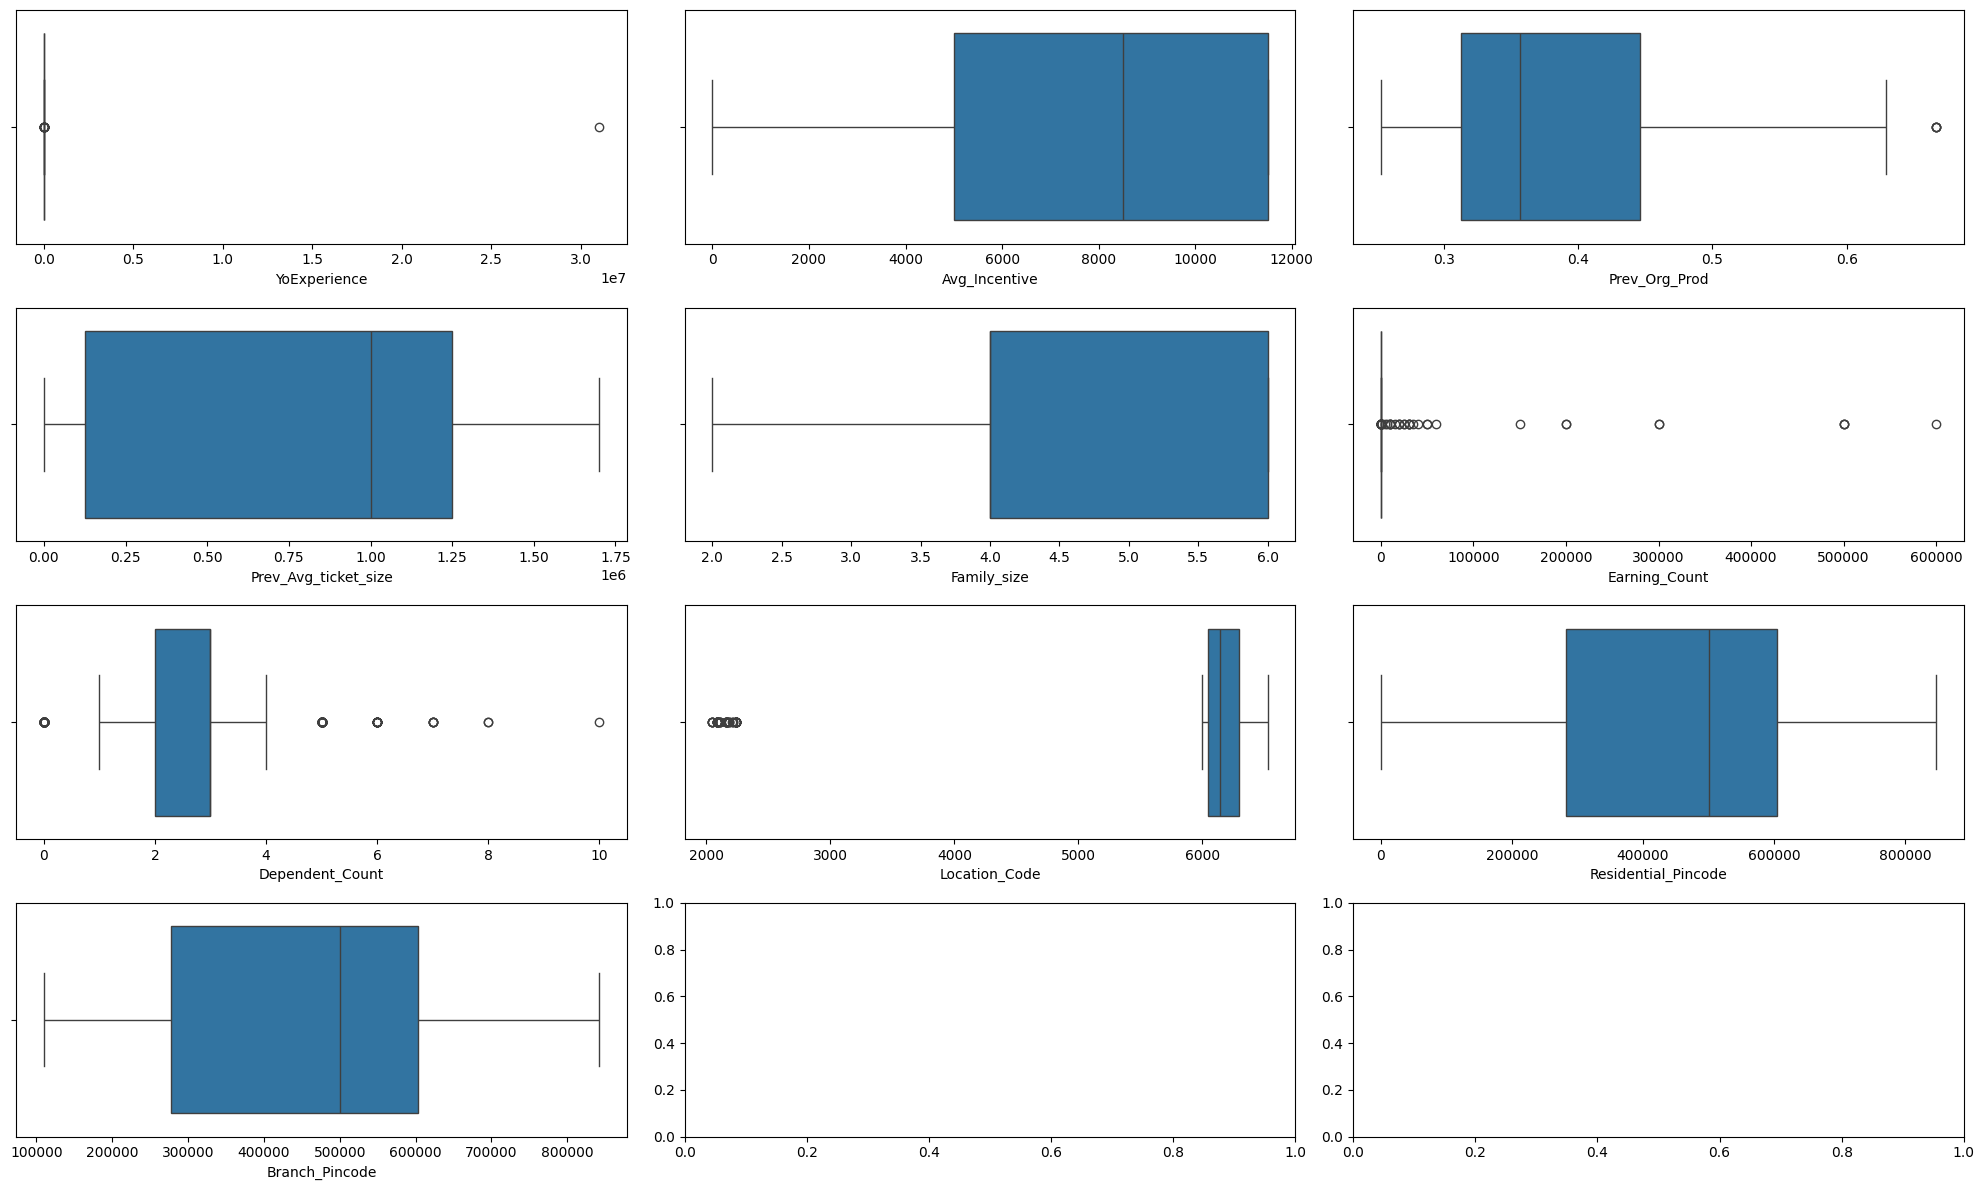

In [73]:
numerical_cols = [ col for col  in combined_struct_data.select_dtypes(exclude='O')  ]
def boxplot_num():
    print(numerical_cols)
    fig, axes = plt.subplots(4, 3, figsize=(20, 12))
    axes = axes.flatten() 
    for idx, n_col in enumerate(numerical_cols):
        ax = axes[idx]
        sns.boxplot(data= combined_struct_data, x = n_col, ax = ax)    
    plt.tight_layout()
    plt.show()
boxplot_num()


In [74]:
def removoe_outliers(col_list):
    for n_col in col_list:
        Q1 = combined_struct_data[n_col].quantile(0.25)
        Q3 = combined_struct_data[n_col].quantile(0.75)

        IQR = Q3-Q1
        if n_col in ["YoExperience", "Earning_Count"]:
            combined_struct_data.loc[(combined_struct_data[n_col]> (Q3 + 1.5*IQR)) | (combined_struct_data[n_col] < (Q1 - 1.5*IQR)), n_col] = np.nan
        else:
            combined_struct_data.loc[(combined_struct_data[n_col] > (Q3 + 1.5*IQR)), n_col] = (Q3 + 1.5*IQR)
            combined_struct_data.loc[(combined_struct_data[n_col] < (Q1 - 1.5*IQR)), n_col] = (Q1 - 1.5*IQR)


['YoExperience', 'Avg_Incentive', 'Prev_Org_Prod', 'Prev_Avg_ticket_size', 'Family_size', 'Earning_Count', 'Dependent_Count', 'Location_Code', 'Residential_Pincode', 'Branch_Pincode']


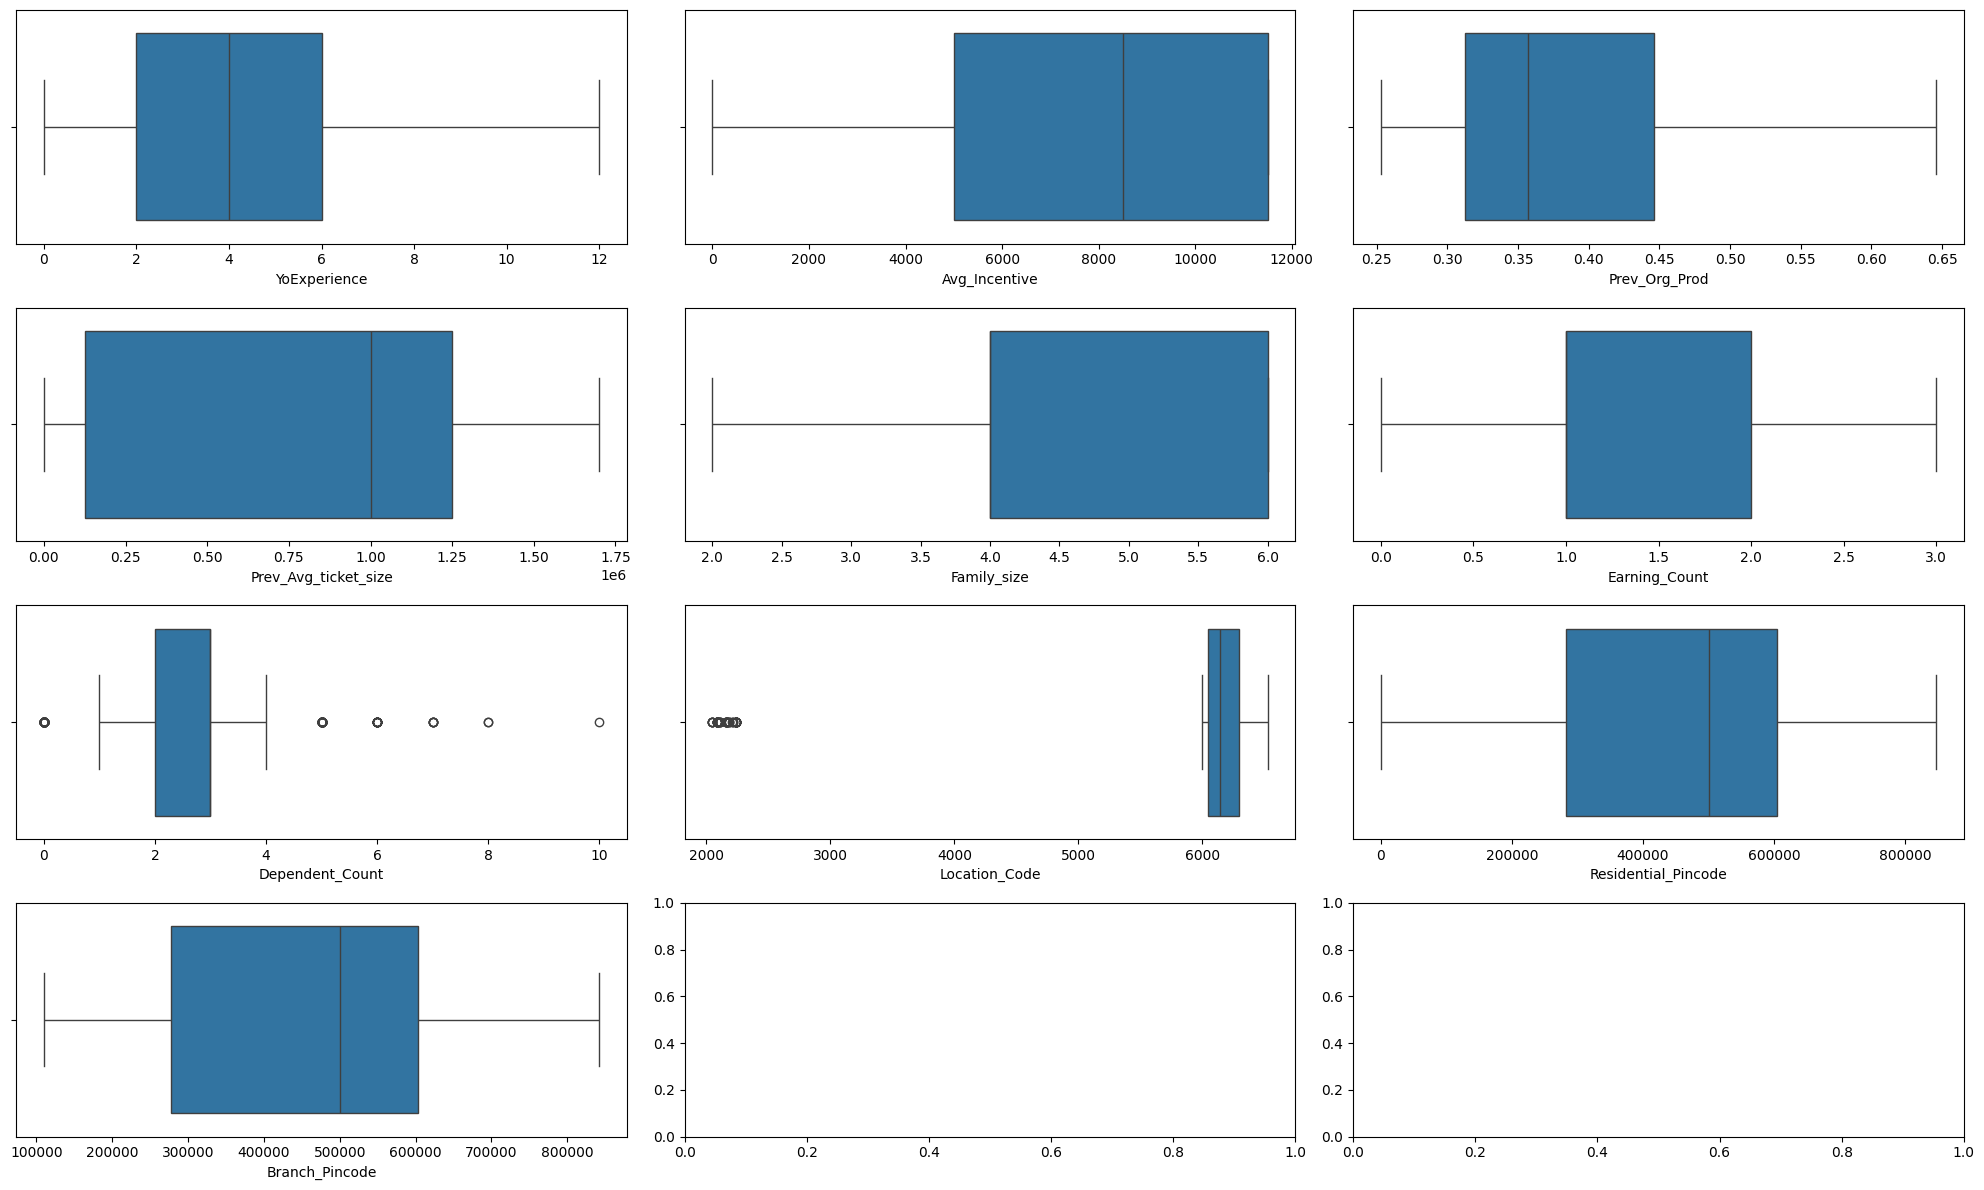

In [75]:

removoe_outliers(["YoExperience", "Earning_Count", "Prev_Org_Prod"])
print(numerical_cols)
fig, axes = plt.subplots(4, 3, figsize=(20, 12))
axes = axes.flatten() 
for idx, n_col in enumerate(numerical_cols):
    ax = axes[idx]
    sns.boxplot(data= combined_struct_data, x = n_col, ax = ax)    
plt.tight_layout()
plt.show()

In [76]:
cols_for_impute = ['Graduation', 'Qualification',
       'YoExperience', 'Prev_Industry', 'Prev_Org', 'No_of_Pre_Org',
       'Avg_Incentive', 'Referral_Source', 'Prev_Org_Prod',
       'Prev_Avg_ticket_size', 'Family_size', 'Earning_Count',
       'Dependent_Count', 'Department', 'DOJ', 'Location_Code',
       'Residential_Pincode', 'Branch_Pincode']

# Select data for imputation
data_for_imputation = combined_struct_data[cols_for_impute].copy()

# for i in  {item for sublist in data_for_imputation["Prev_Org_Prod"].dropna() for item in sublist}:
#        val = np.zeros((930,1))
#        for idx in range(data_for_imputation.shape[0]):
#               if isinstance(data_for_imputation["Prev_Org_Prod"][idx], np.ndarray ):
#                      val[idx] = str(i) in data_for_imputation["Prev_Org_Prod"][idx]
#               else: 
#                      val[idx] = np.nan          
#        data_for_imputation[str(i)]  = val
# data_for_imputation.drop("Prev_Org_Prod", axis =1 ,inplace =True)


# One-hot encode 'Prev_Org_Prod'
# if 'Prev_Org_Prod' in data_for_imputation.columns:
#     # Flatten unique items from all non-null lists
#     unique_items = {item for sublist in data_for_imputation["Prev_Org_Prod"].dropna() for item in sublist}
#     # Create one-hot encoded columns
#     for item in unique_items:
#         data_for_imputation[str(item)] = data_for_imputation["Prev_Org_Prod"].apply(
#             lambda x:  int(isinstance(x, np.ndarray) and str(item) in map(str, x) )
#         )
#         combined_struct_data[str(item)] = data_for_imputation["Prev_Org_Prod"].apply(
#             lambda x:  int(isinstance(x, np.ndarray) and str(item) in map(str, x) )
#         )
#     # Drop the original 'Prev_Org_Prod' column
#     data_for_imputation.drop("Prev_Org_Prod", axis=1, inplace=True)
# one_hot_columns = list(unique_items)
# data_for_imputation[one_hot_columns].head()




# data imputataion using lightgbm
cols_with_nans = [ x for x in data_for_imputation if data_for_imputation[x].isnull().sum() >0 ]
num_cols_with_nan = [ col for col in data_for_imputation[cols_with_nans].select_dtypes(exclude = "O")]
cat_cols_with_nan = [ col for col in data_for_imputation[cols_with_nans].select_dtypes(include = "O")]

print(f"Columns with numerical data : {num_cols_with_nan}")
print(f"Columns with categorical data : {cat_cols_with_nan}")

Columns with numerical data : ['YoExperience', 'Prev_Org_Prod', 'Earning_Count', 'Location_Code', 'Branch_Pincode']
Columns with categorical data : ['Graduation', 'Qualification', 'Prev_Org', 'No_of_Pre_Org']


In [77]:
# for imputation for numerical columns
# lightGBM uses techniques :
# 1. GOSS : Gradient Loss one side sampling
# 2. EFB : Exclusive Feature Bundling
# 3. Binning

def drop_over_50_nan(df, col):
    # excluding the colum which have more than half the data missing 
    if df[col].isnull().sum() > int(len(df)/2):
        df.drop(col, axis = 1,  inplace = True )
        print(f'Dropped {col} because it hos more than 50%')    
    return df

def factorize(data):
    # converting the categorical columns to numerical types 
    for cat_col in data.select_dtypes(include = 'O'):
        
        # frequency encoding for each value and summing them up 
        # if cat_col == "Prev_Org_Prod":
        #     all_values = [ item for sublist in data[cat_col].dropna() for item in sublist]
        #     value_counts = pd.Series(all_values).value_counts()
        #     freq_dict = value_counts.to_dict()
            
        #     def freq_sum( lst):
        #         if isinstance(lst, list):
        #             return sum(freq_dict[val] for val in lst)
        #         return 0
    
        #     data[cat_col] = data[cat_col].apply( freq_sum)
        # else:
        #     data[cat_col] = pd.factorize(data[cat_col])[0] # factorize  
         
        data[cat_col] = pd.factorize(data[cat_col])[0]
    return data

def create_splits(data, col):
    train = data[data['is_nan']==0]
    test = data[data['is_nan']==1]
    # print(len(test))

    X_train = train.drop([col, 'is_nan'], axis = 1)
    y_train = train[col]
    X_test = test.drop([col, 'is_nan'], axis = 1)
    return X_train , y_train, X_test

def train_predict( mode , X_train , y_train, X_test):
    if mode == "regression":
        model = LGBMRegressor()
    else:
        model = LGBMClassifier()
        
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)    
    return y_pred

def impute_missing(dataset, cols_lst, mode):
    for col in cols_lst:
        df= drop_over_50_nan(dataset, col)
        # copying the dataframe without 
        data = df.copy()
        # finding the nan indexes for the col 
        # Ensure correct mapping of indices
        nan_ixs = np.where(data[col].isna())[0]

        # Correctly set the 'is_nan' column
        data['is_nan'] = 0  # Initialize
        data.loc[nan_ixs, 'is_nan'] = 1

        X = data.drop([col], axis =1)
        y = data[col]
        X = factorize(X)
        data = X.join(y)        
        X_train , y_train, X_test = create_splits(data, col)

        y_pred= train_predict( mode, X_train , y_train, X_test )
        # print(col, y_pred)
        data_for_imputation.loc[nan_ixs, col] = y_pred
        # print(combined_struct_data.isna().sum())
    return df

In [78]:
df = data_for_imputation.copy()
df = impute_missing(df, num_cols_with_nan, 'regression')

df = data_for_imputation.copy()
df = impute_missing(df,cat_cols_with_nan , 'not')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 821, number of used features: 17
[LightGBM] [Info] Start training from score 4.022834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [79]:
for col in cat_cols_with_nan+ num_cols_with_nan:
    if col in ["Earning_Count", "Branch Pincode", "Residential Pincode"]: combined_struct_data[col] = np.int64(data_for_imputation[col])
    else : combined_struct_data[col] = data_for_imputation[col]
combined_struct_data.isna().sum()

CandidateID             0
Designation             0
Graduation              0
Qualification           0
YoExperience            0
Prev_Industry           0
Prev_Org                0
No_of_Pre_Org           0
Avg_Incentive           0
Referral_Source         0
Prev_Org_Prod           0
Prev_Avg_ticket_size    0
Family_size             0
Earning_Count           0
Dependent_Count         0
Department              0
DOJ                     0
Location_Code           0
Residential_Pincode     0
Branch_Pincode          0
dtype: int64

In [80]:
save_dataset(combined_struct_data, "imputed_preprocessed_train_test_data")

In [191]:
combined_struct_data = pd.read_pickle("imputed_preprocessed_train_test_data.pkl")

## Univariate Analysis

In [192]:
# uni variate analysis
# histograms
# barplot
# Density Plot (KDE):  the distribution of the variabl
# QQ plot : to check normality
# violin : KDE and box plot, 
# rugplot : for granular insights
# Word Cloud : Prev_Org
# Pair plots

['YoExperience', 'Avg_Incentive', 'Prev_Org_Prod', 'Prev_Avg_ticket_size', 'Family_size', 'Earning_Count', 'Dependent_Count', 'Location_Code', 'Residential_Pincode', 'Branch_Pincode']


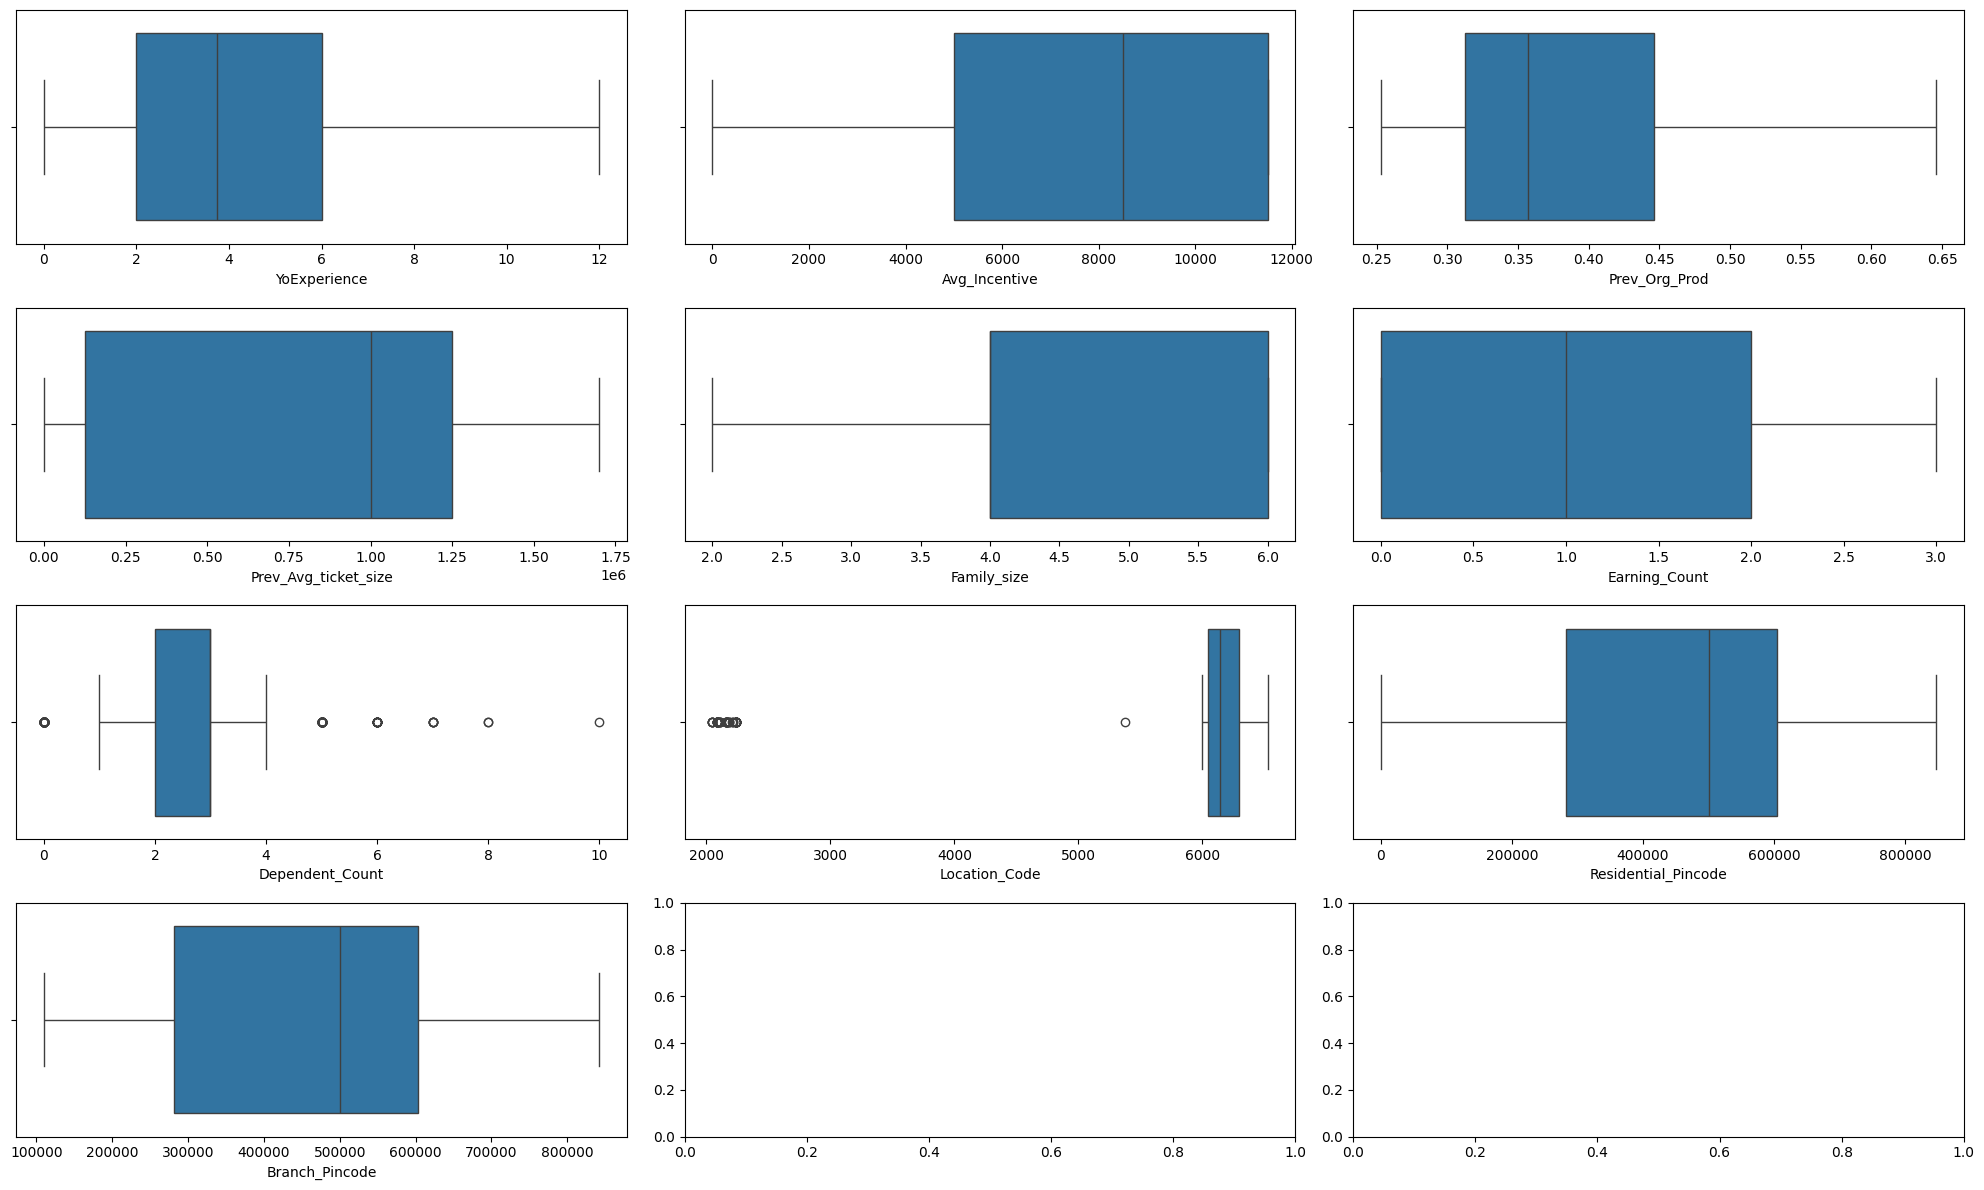

In [193]:
combined_struct_data["Distance"] = ((combined_struct_data["Residential_Pincode"] - combined_struct_data["Branch_Pincode"])**2)**(0.5)
boxplot_num()



['YoExperience', 'Avg_Incentive', 'Prev_Org_Prod', 'Prev_Avg_ticket_size', 'Family_size', 'Earning_Count', 'Dependent_Count', 'Location_Code', 'Residential_Pincode', 'Branch_Pincode']


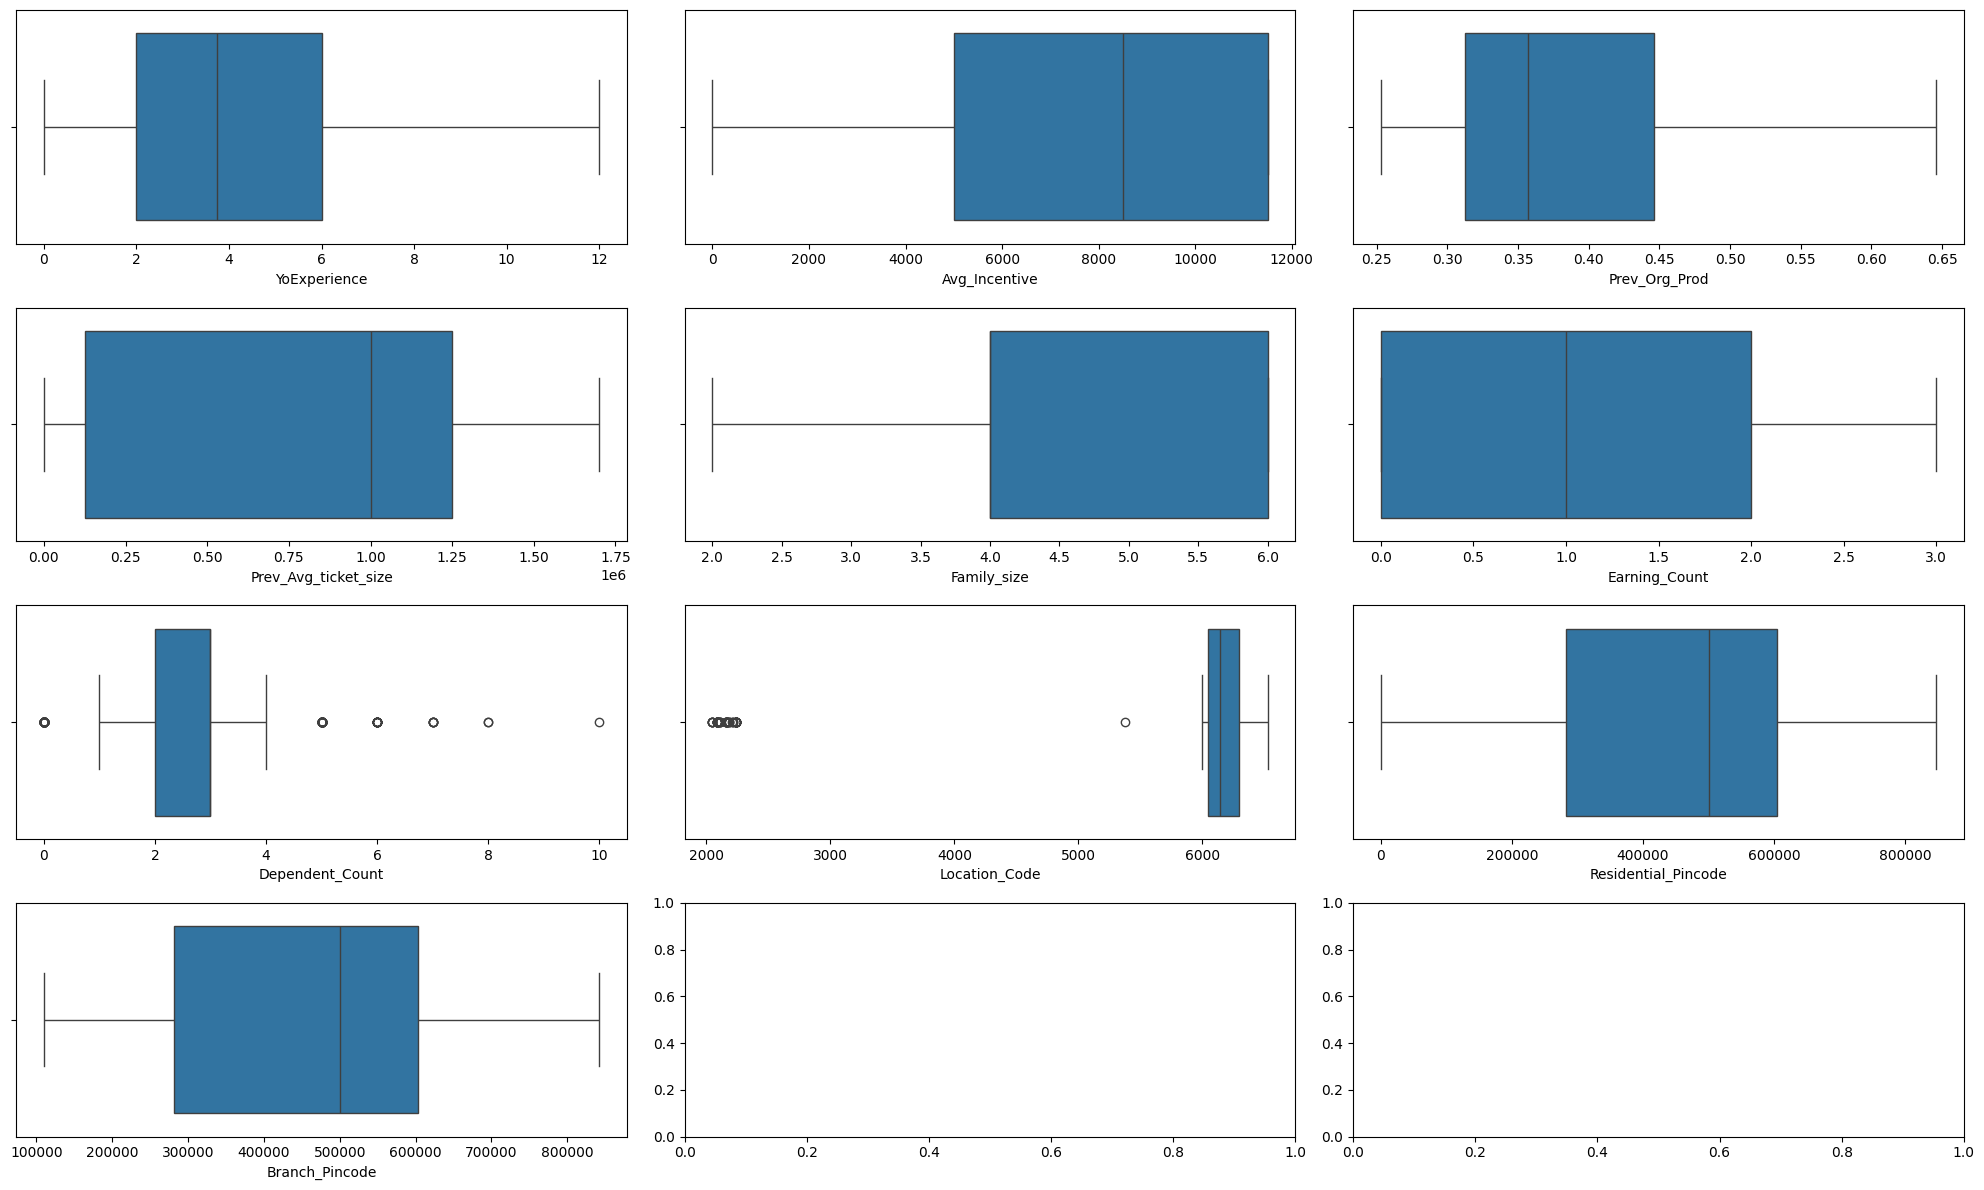

In [194]:
removoe_outliers(["Distance"])
boxplot_num()

In [195]:
combined_struct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CandidateID           930 non-null    object 
 1   Designation           930 non-null    object 
 2   Graduation            930 non-null    object 
 3   Qualification         930 non-null    object 
 4   YoExperience          930 non-null    float64
 5   Prev_Industry         930 non-null    object 
 6   Prev_Org              930 non-null    object 
 7   No_of_Pre_Org         930 non-null    object 
 8   Avg_Incentive         930 non-null    float64
 9   Referral_Source       930 non-null    object 
 10  Prev_Org_Prod         930 non-null    float64
 11  Prev_Avg_ticket_size  930 non-null    float64
 12  Family_size           930 non-null    float64
 13  Earning_Count         930 non-null    int64  
 14  Dependent_Count       930 non-null    int64  
 15  Department            9

Columns with nuemerical values : ['YoExperience', 'Avg_Incentive', 'Prev_Org_Prod', 'Prev_Avg_ticket_size', 'Family_size', 'Earning_Count', 'Dependent_Count', 'Location_Code', 'Residential_Pincode', 'Branch_Pincode', 'Distance']


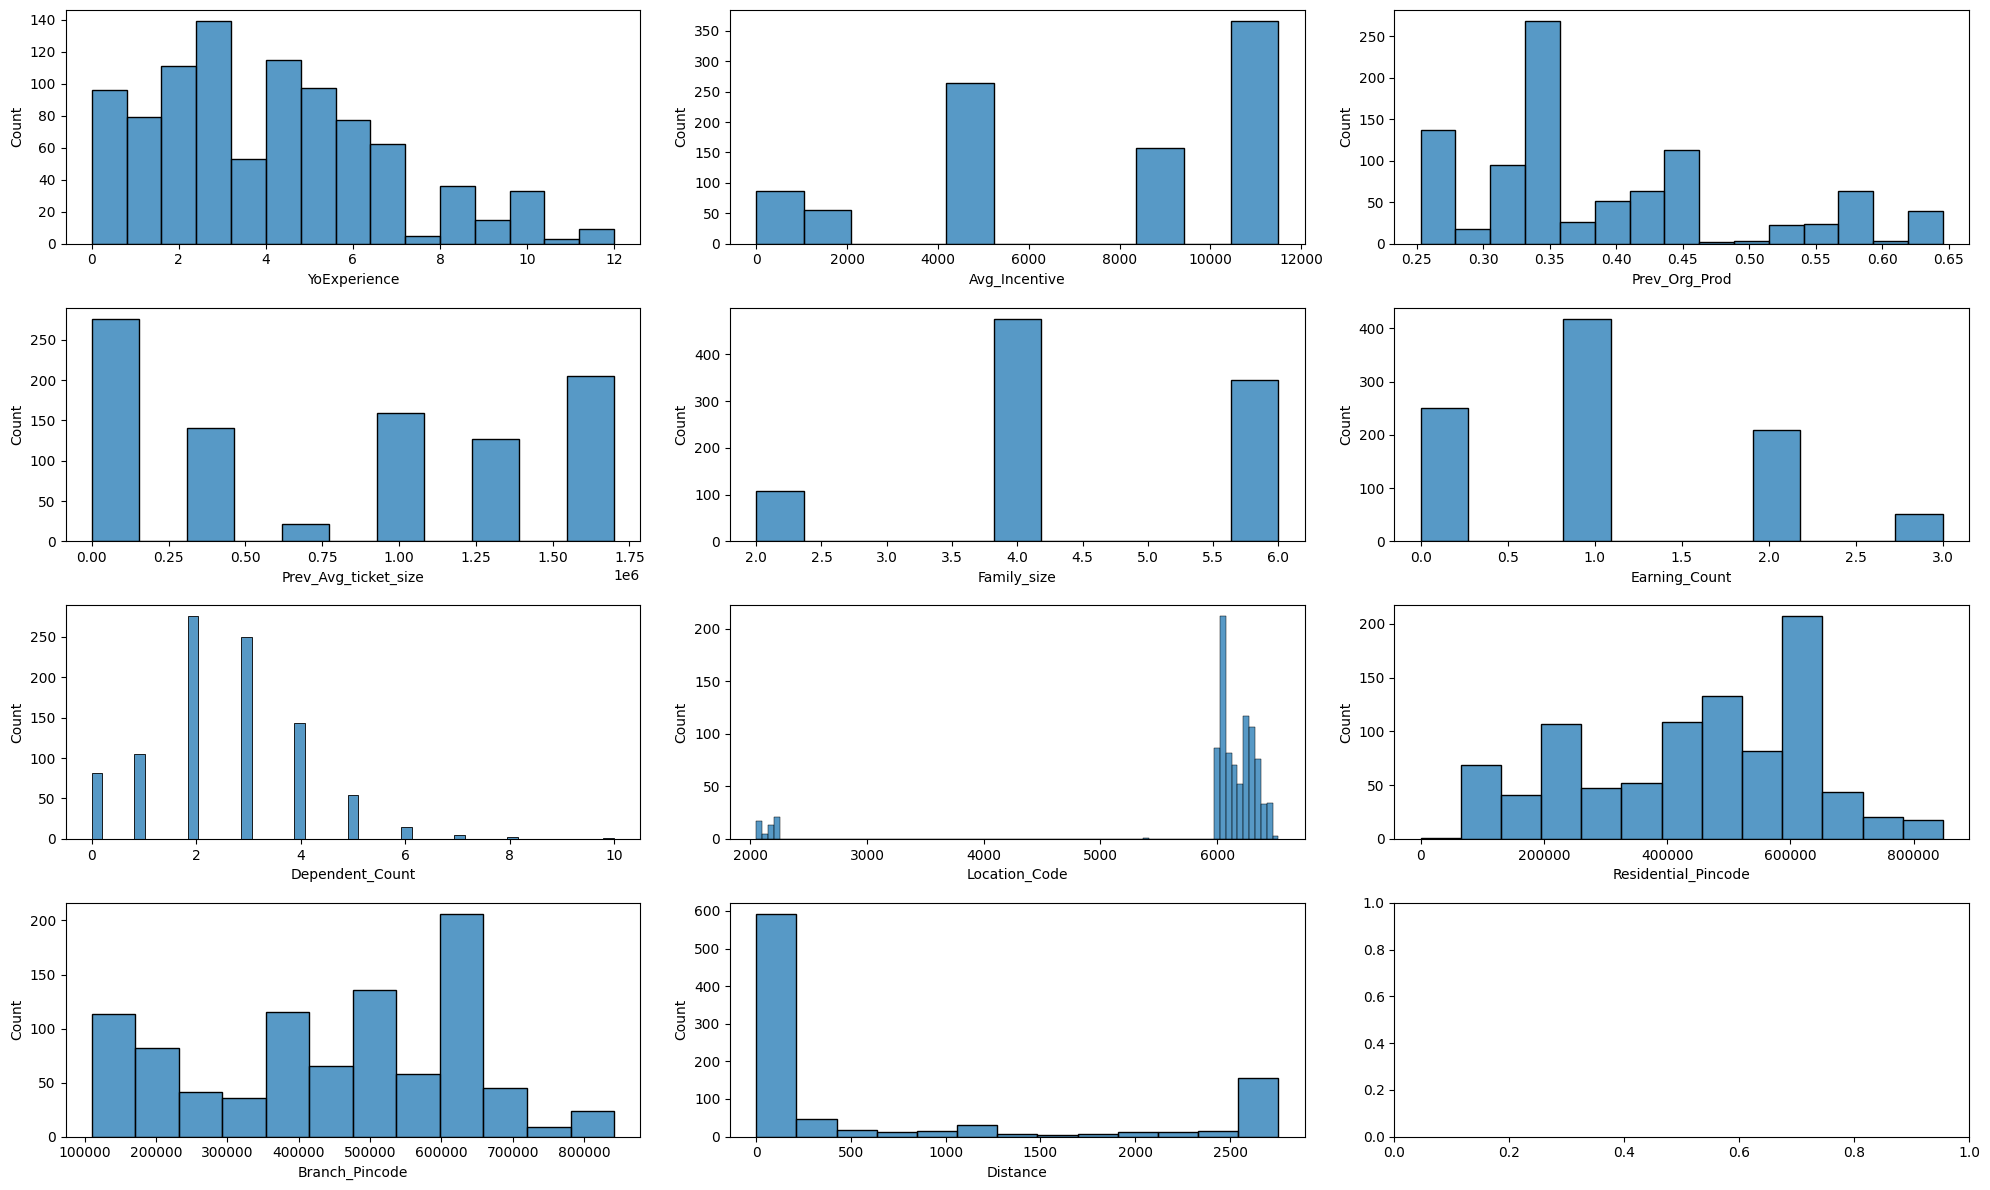

In [196]:
num_cols = [ col for col in combined_struct_data.select_dtypes(exclude = "O")]
print(f"Columns with nuemerical values : {num_cols}")

fig, axes = plt.subplots(4,3, figsize = (20, 12))
axes=axes.flatten()
for idx, col in enumerate(num_cols):
    ax = axes[idx]
    sns.histplot(data = combined_struct_data, x = col, ax= ax)   
    # ax.set_title(f'Performance Distribution for {cat_col}') 
plt.tight_layout()
plt.show()

1. YoExperience , Perv_Org_Prod, Prev_Avg_ticket_size : right skewed data ( box - cox transformation can be used ) 
2. Family_size , Earning_Count, Dependent_Count :  highly concentrated values 
3. Residential and Branch Pincode can be used to create new feature : Distance 
4. Location_Code can serve as binary variable with values : 2 , 6 
5. Dependent_Count show extreme values in the tails . ( there could be outliers ) \

But need to check relationship with respect to target variables 


['YoExperience', 'Avg_Incentive', 'Prev_Org_Prod', 'Prev_Avg_ticket_size', 'Family_size', 'Earning_Count', 'Dependent_Count', 'Location_Code', 'Distance']


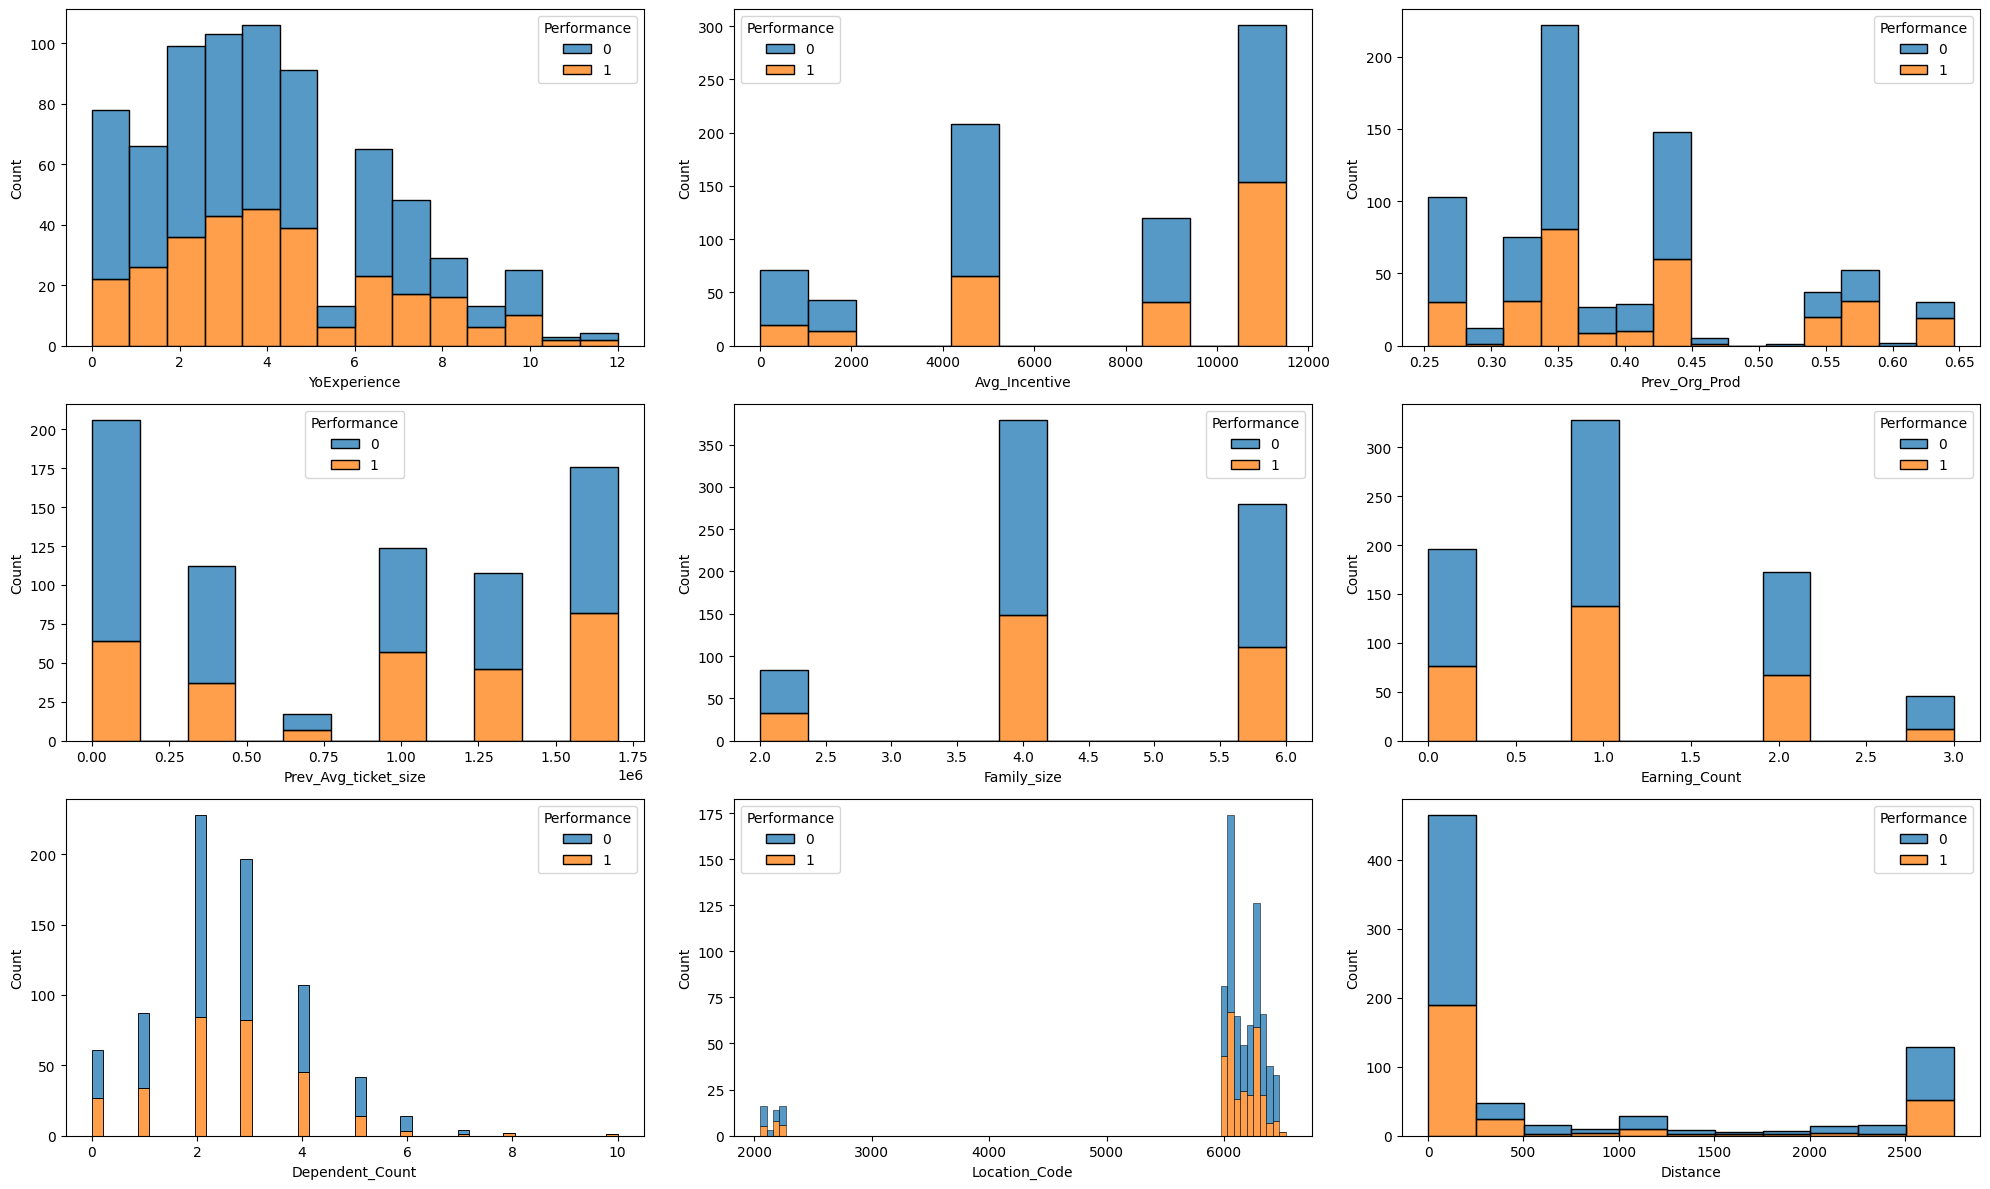

In [197]:
fig, axes = plt.subplots(3,3, figsize = (20, 12))
axes=axes.flatten()
struct_train_df[num_cols] = combined_struct_data[num_cols][:743]
struct_train_df["Distance"]= combined_struct_data["Distance"][:743]
num_cols.remove('Residential_Pincode')
num_cols.remove('Branch_Pincode')
print(num_cols)
for idx, col in enumerate(num_cols):
    ax = axes[idx]
    sns.histplot(data = struct_train_df, x = col, multiple="stack",  hue = "Performance", ax= ax)   
    # ax.set_title(f'Performance Distribution for {cat_col}') 
plt.tight_layout()
plt.show()

1.  YoExperience : high proportion of Performance = 1 is observed in the range of 3-6 years, while Performance = 0 dominates at lower experience levels (0-2 years)
2.  Avg_Incentive : Performance = 1 proportion increase with increaing incentive ( positive correlation )
3.  Prev_Org_Prod : with skewed data, higher Proportion concentrated here around 0.4 -0.5  , 
4.  Prev_avg_ticket_size : High Proportion of Performance =1 around high values ( 1.75)
5.  Family_size : more or less even , around 4 have more 1's as performance 
6.  Earning_Count : high performance around 1
7.  Dependent Count : Dereacsing trend with increasing value
8.  Distance : Suggests closeness have some relation 

In [198]:
struct_train_df["Referral_Source"].value_counts()

Referral_Source
Referral                      424
Consultant / Partners          83
Advertisement / Job Portal     61
Direct Application             54
External consultant            49
others                         36
Others                         30
Campus                          6
Name: count, dtype: int64

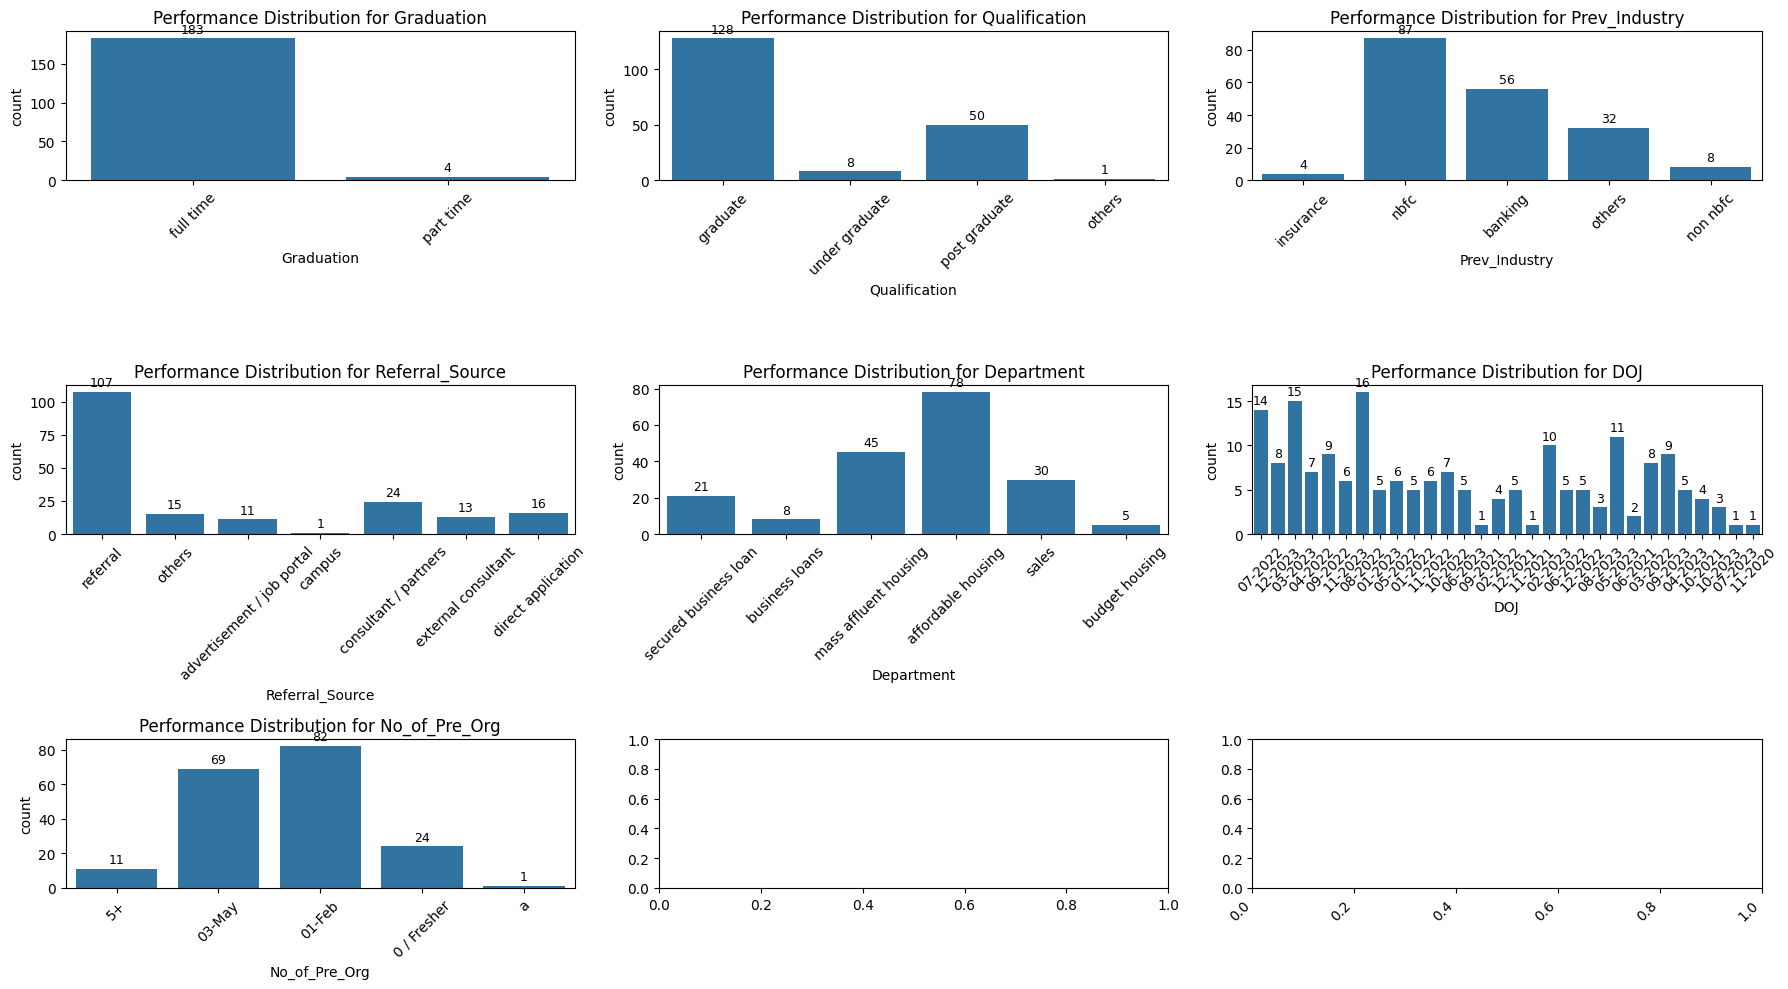

In [199]:
# univariate categorical data analysis 
categorical_columns = [
     "Graduation", "Qualification", "Prev_Industry", "Referral_Source", "Department", "DOJ", "No_of_Pre_Org"
]
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten() 
for idx, cat_col in enumerate(categorical_columns):
    # plt.figure(figsize=(2,2))
    ax= axes[idx]
    sns.countplot(data= combined_struct_data.iloc[743:], x=cat_col, ax= ax)
    ax.set_title(f'Performance Distribution for {cat_col}')
    ax.tick_params(axis='x', rotation=45)
    plt.xticks(rotation=45,  ha='right') 
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)
    
plt.tight_layout()
plt.show()


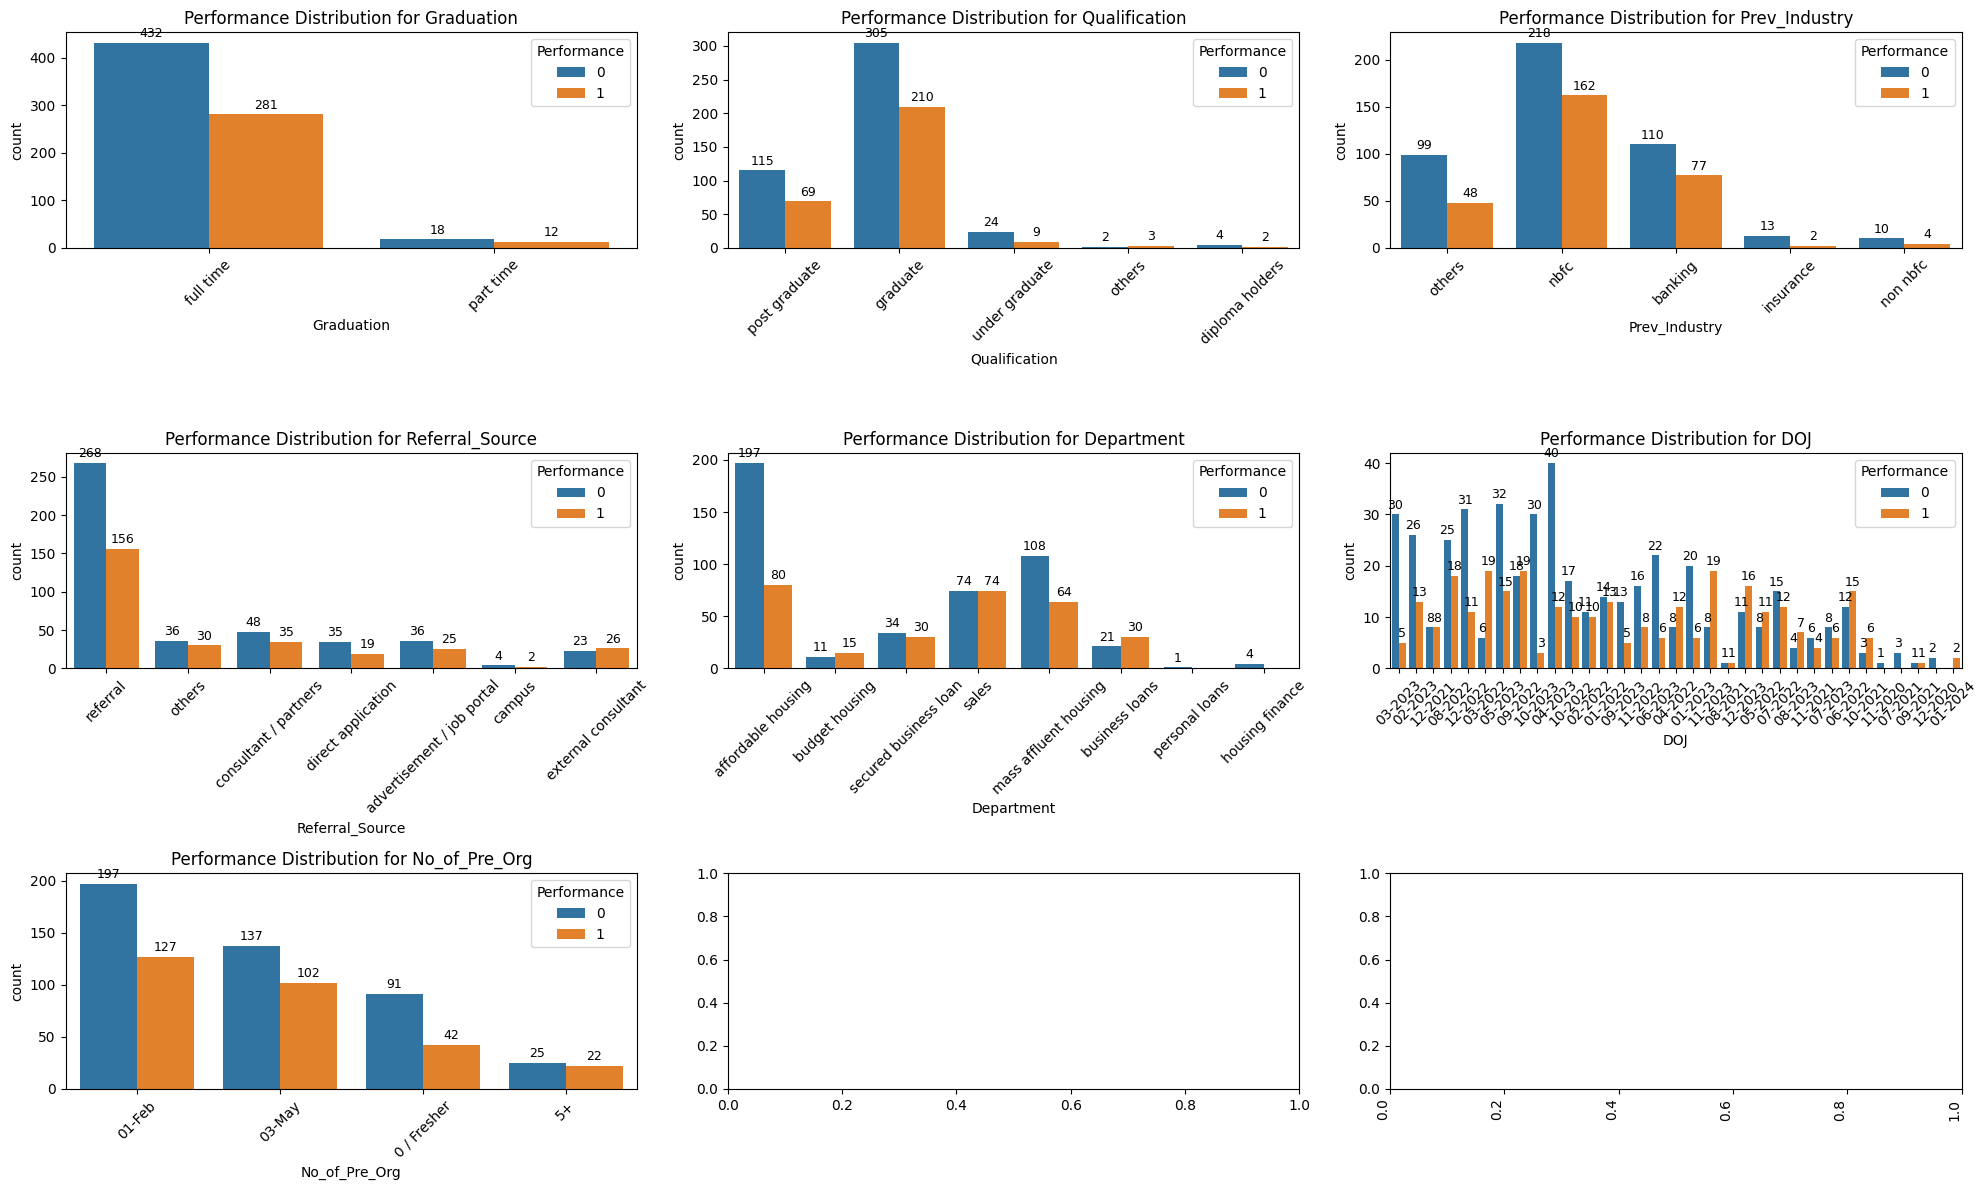

In [200]:

data = pd.concat([combined_struct_data.iloc[:743], struct_train_df["Performance"]], axis = 1)

fig, axes = plt.subplots(3, 3, figsize=(20, 12))
axes = axes.flatten() 
for idx, cat_col in enumerate(categorical_columns):
    ax= axes[idx]
    sns.countplot(data=data, x=cat_col, hue='Performance', ax= ax)
    ax.set_title(f'Performance Distribution for {cat_col}')
    ax.tick_params(axis='x', rotation=45)
    plt.xticks(rotation=90,  ha='right') 
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)
    
plt.tight_layout()
plt.show()


1. Designation is just one value so it wont contribute to prediciton
2. Graduation : full time and part tiem as frequency target encoding values (numerical conversion to capture the relation with target and occurance ) ; it can be seen that 'Full time' value higher than 'part time' for performance
3. Qualification : Combine groups as Higher education , mid or lower education ; as 'graduate' and 'post graduate' contribute to higher proporstion of Performance =1 combine them as one group seems as option
4. Prev_Industry : Since the values in "insurance' and 'non nbfc' sector are low combining it with 'other' is good option ; Performance proportion in 'others' , 'insurance' and 'non nbfc' are not high 
5. Referral_Source : Here as well smaller groups can be combined as 'others' section as they dont form the majority i.e. 'referral' ; as 'referral' , 'other+ direct application/ + adertisement + job portal , campus ' , ' consultants' 
6. Department : combine smaller into groups such as : budget hosuing , mass affluent housing , housing finanace , same with loans and keeping sales as different 

In [201]:
combined_struct_data.columns

Index(['CandidateID', 'Designation', 'Graduation', 'Qualification',
       'YoExperience', 'Prev_Industry', 'Prev_Org', 'No_of_Pre_Org',
       'Avg_Incentive', 'Referral_Source', 'Prev_Org_Prod',
       'Prev_Avg_ticket_size', 'Family_size', 'Earning_Count',
       'Dependent_Count', 'Department', 'DOJ', 'Location_Code',
       'Residential_Pincode', 'Branch_Pincode', 'Distance'],
      dtype='object')

In [202]:
# grouping the data

referral_group_dict = { 'advertisement / job portal': "others", 
                       'campus': "others",
                       'direct application': "others" , 
                       'consultant / partners' : "consultant",
                       'external consultant': "consultant"
}
combined_struct_data["Referral_Source"] = combined_struct_data["Referral_Source"].replace(referral_group_dict)
combined_struct_data["Referral_Source"].unique()

dept_group_dict = {
    'affordable housing': "housing", 
    'budget housing' : "housing", 
    'secured business loan': "loans",
    'mass affluent housing' : "housing", 
    'business loans' : "loans",
       'personal loans' : "loans", 
       'housing finance': "housing"
}

combined_struct_data["Department"] = combined_struct_data["Department"].replace(dept_group_dict)
combined_struct_data["Department"].unique()



Qualification_group_dict = {
   'post graduate' : 'higher_education', 
   'graduate': 'higher_education',
   'under graduate' : 'Mid_education',
   'others' : 'Mid_education',
   'diploma holders' : 'Mid_education'
}

combined_struct_data["Qualification"] = combined_struct_data["Qualification"].replace(Qualification_group_dict)
combined_struct_data["Qualification"].unique()



Industry_group_dict = {
   'insurance' : 'others', 
   'non nbfc' : 'others'
}

combined_struct_data["Prev_Industry"] = combined_struct_data["Prev_Industry"].replace(Industry_group_dict)
combined_struct_data["Prev_Industry"].unique()



array(['others', 'nbfc', 'banking'], dtype=object)

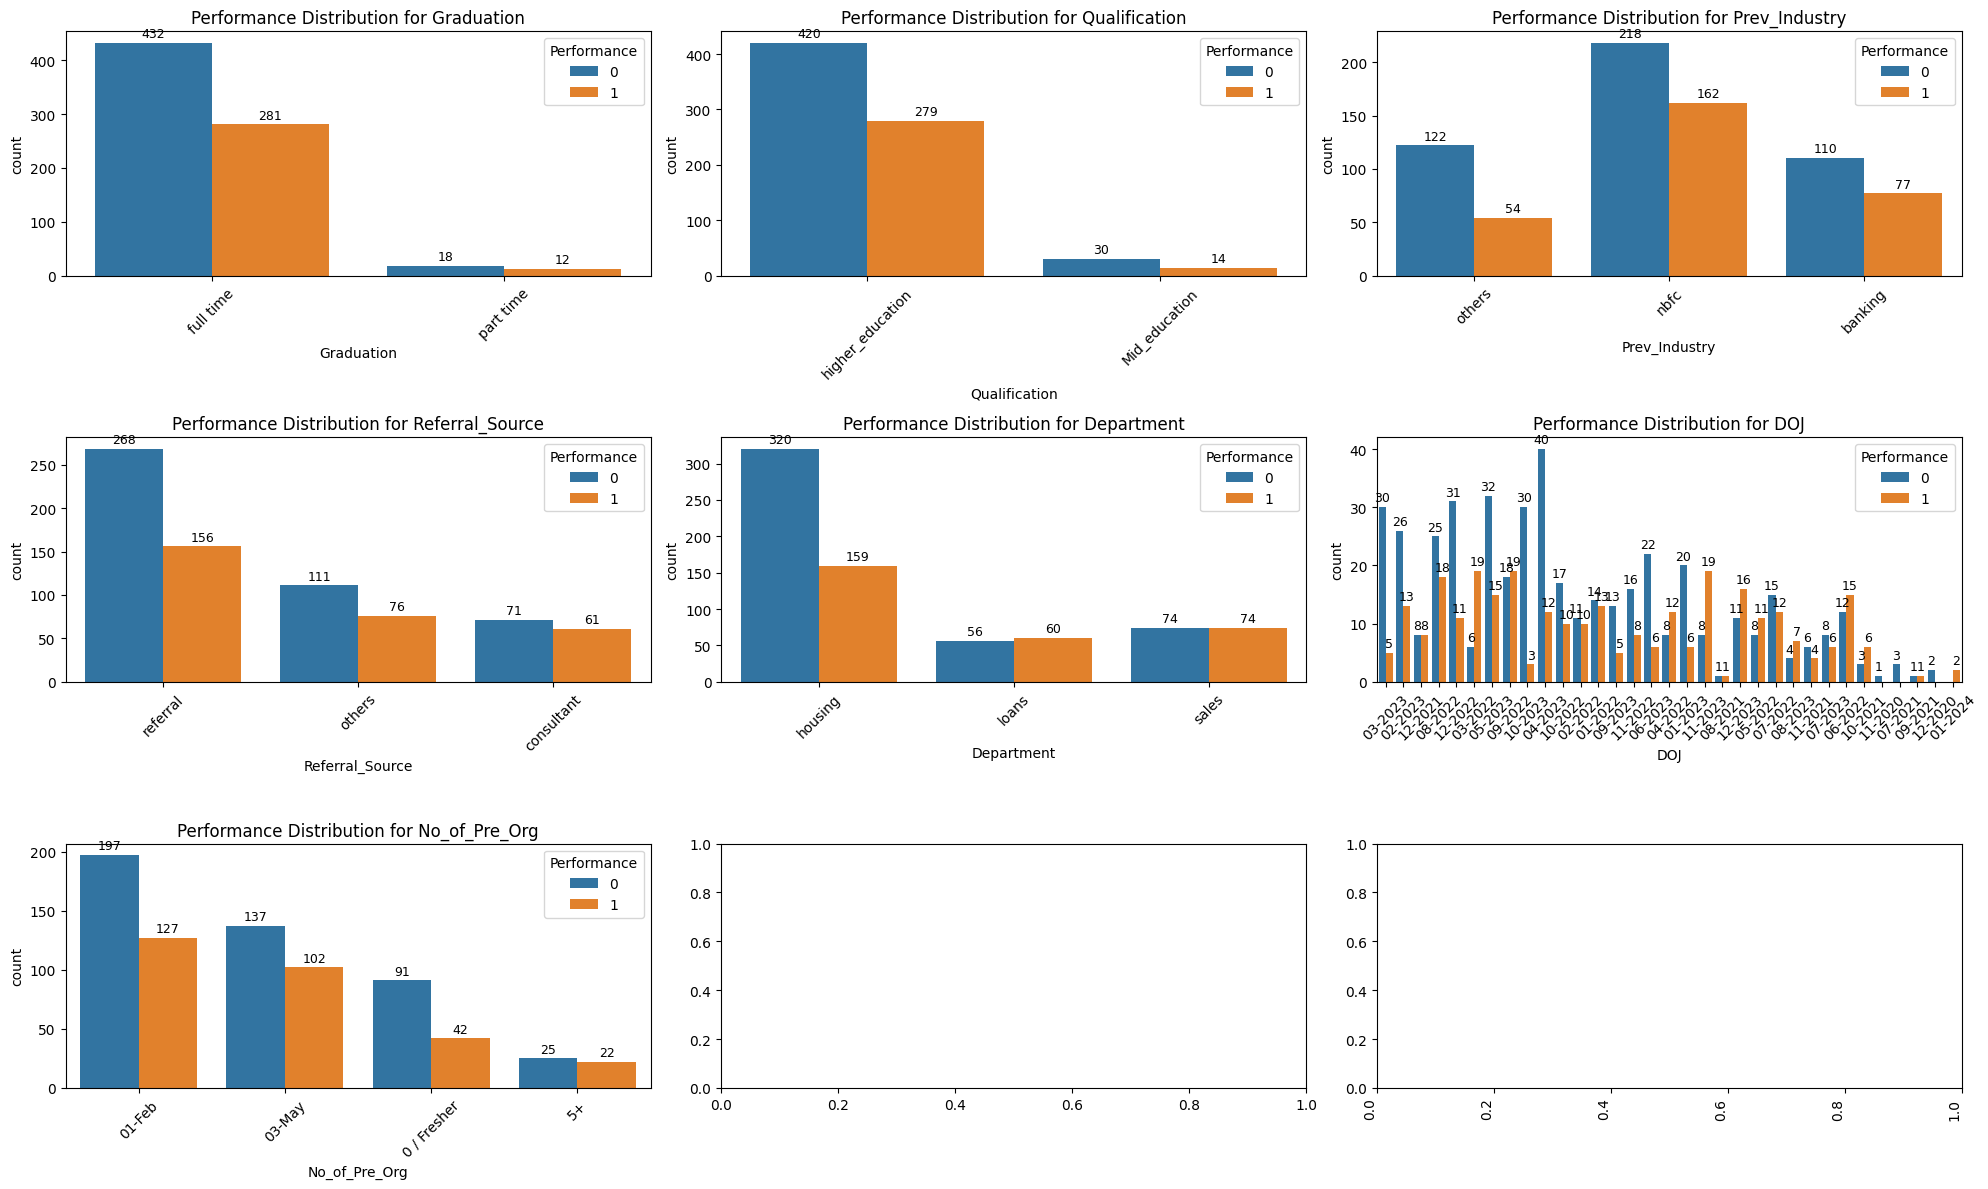

In [203]:
data = pd.concat([combined_struct_data.iloc[:743], struct_train_df["Performance"]], axis = 1)

fig, axes = plt.subplots(3, 3, figsize=(20, 12))
axes = axes.flatten() 
for idx, cat_col in enumerate(categorical_columns):
    ax= axes[idx]
    sns.countplot(data=data, x=cat_col, hue='Performance', ax= ax)
    ax.set_title(f'Performance Distribution for {cat_col}')
    ax.tick_params(axis='x', rotation=45)
    plt.xticks(rotation=90,  ha='right') 
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)
    
plt.tight_layout()
plt.show()


In [204]:
(combined_struct_data['Prev_Industry'].value_counts()/930).to_dict()

{'nbfc': 0.5021505376344086,
 'banking': 0.26129032258064516,
 'others': 0.23655913978494625}

In [205]:
struct_train_df.groupby( by  = 'Prev_Industry')['Performance'].mean().to_dict()

{'Banking': 0.4117647058823529,
 'Insurance': 0.13333333333333333,
 'NBFC': 0.4263157894736842,
 'Non NBFC': 0.2857142857142857,
 'Others': 0.3048780487804878,
 'others': 0.35384615384615387}

In [206]:
combined_struct_data["No_of_Pre_Org"].unique()

array(['01-Feb', '03-May', '0 / Fresher', '5+', 'a'], dtype=object)

In [207]:
mean_performance = struct_train_df["Performance"].mean()


def feature_encoding(col_list):
    data = pd.concat([combined_struct_data.iloc[:743], struct_train_df["Performance"]], axis = 1)
 
    for col in col_list:
        freq_encoding  = (combined_struct_data[col].value_counts()/930).to_dict()
        target_encoding = data.groupby( by  = col)['Performance'].mean().to_dict()
        # weighted_encoding = {}
        
        # for key in freq_encoding:
        #     weighted_encoding[key]  =  ((1-mean_performance) * freq_encoding.get(key, 0) + mean_performance * target_encoding.get(key, 0))*100

        weighted_encoding = {
                            
                            key: ((mean_performance) * freq_encoding.get(key, 0) + ( 1 - mean_performance ) * target_encoding.get(key, 0)) * 100
                            #   key: ((1 - mean_performance) * freq_encoding.get(key, 0) + mean_performance * target_encoding.get(key, 0)) * 100
                              for key in freq_encoding
                          }
        print(f"Values for column {col} assigned as : \n {weighted_encoding}")
        combined_struct_data[col]=combined_struct_data[col].map(weighted_encoding)

feature_encoding(categorical_columns)


Values for column Graduation assigned as : 
 {'full time': 61.8623688633259, 'part time': 25.667809953834354}
Values for column Qualification assigned as : 
 {'higher_education': 61.36149184969231, 'Mid_education': 21.518124851168743}
Values for column Prev_Industry assigned as : 
 {'nbfc': 45.622101317636556, 'banking': 35.24255479989069, 'others': 27.911172244302968}
Values for column Referral_Source assigned as : 
 {'referral': 44.79940593848531, 'others': 34.36743824039801, 'consultant': 35.154593738364845}
Values for column Department assigned as : 
 {'housing': 45.842709233772815, 'sales': 37.8303593394984, 'loans': 37.47529157316015}
Values for column DOJ assigned as : 
 {'08-2022': 27.854679012956467, '05-2023': 21.78871326462525, '04-2023': 16.39356909317401, '03-2023': 10.772328729173255, '02-2023': 22.266168830229088, '12-2022': 17.855271835647816, '09-2022': 33.05162236868918, '07-2022': 28.656420498125872, '10-2023': 7.032439622202137, '12-2023': 37.3746363912647, '10-2022

In [208]:
combined_struct_data.head()

CandidateID Designation  Graduation  Qualification  YoExperience  \
0     EMP0001         dst   61.862369      61.361492           4.0   
1     EMP0002         dst   61.862369      61.361492           8.0   
2     EMP0004         dst   61.862369      61.361492           5.0   
3     EMP0005         dst   61.862369      61.361492           5.5   
4     EMP0006         dst   61.862369      61.361492           1.0   

   Prev_Industry             Prev_Org  No_of_Pre_Org  Avg_Incentive  \
0      27.911172  innovative solution      40.955682         5000.0   
1      45.622101        altum_finance      38.908044         8500.0   
2      45.622101            kogta_ltd      40.955682        11500.0   
3      35.242555            axis_bank      40.955682         8500.0   
4      27.911172         soni finance      25.783136            0.0   

   Referral_Source  ...  Prev_Avg_ticket_size  Family_size  Earning_Count  \
0        44.799406  ...                   0.0          4.0              1   
1        44.799406  ...             1000000.0          6.0              0   
2        34.367438  ...             1700000.0          4.0              1   
3        35.154594  ...             1700000.0          2.0              0   
4        44.799406  ...              125000.0          4.0              1   

   Dependent_Count  Department        DOJ  Location_Code  Residential_Pincode  \
0                2   45.842709  10.772329         6298.0               221715   
1                4   45.842709  22.266169         6048.0               620001   
2                4   37.475292  31.173099         6181.0               414001   
3                2   45.842709  27.854679         6330.0               622504   
4                1   45.842709  17.855272         6374.0               323001   

   Branch_Pincode  Distance  
0        110076.0  2755.625  
1        620001.0     0.000  
2        414001.0     0.000  
3        622001.0   503.000  
4        323001.0     0.000  

[5 rows x 21 columns]

## Learning Embeddings for Prev_Org

In [209]:
embedding_dataset = combined_struct_data.drop(["CandidateID", "Designation", "Location_Code", "Residential_Pincode", "Branch_Pincode",'Family_size', 'Earning_Count','Dependent_Count', 'DOJ' ], axis =1 )
embedding_dataset.head()

Graduation  Qualification  YoExperience  Prev_Industry  \
0   61.862369      61.361492           4.0      27.911172   
1   61.862369      61.361492           8.0      45.622101   
2   61.862369      61.361492           5.0      45.622101   
3   61.862369      61.361492           5.5      35.242555   
4   61.862369      61.361492           1.0      27.911172   

              Prev_Org  No_of_Pre_Org  Avg_Incentive  Referral_Source  \
0  innovative solution      40.955682         5000.0        44.799406   
1        altum_finance      38.908044         8500.0        44.799406   
2            kogta_ltd      40.955682        11500.0        34.367438   
3            axis_bank      40.955682         8500.0        35.154594   
4         soni finance      25.783136            0.0        44.799406   

   Prev_Org_Prod  Prev_Avg_ticket_size  Department  Distance  
0       0.252874                   0.0   45.842709  2755.625  
1       0.445901             1000000.0   45.842709     0.000  
2       0.539794             1700000.0   37.475292     0.000  
3       0.629630             1700000.0   45.842709   503.000  
4       0.356725              125000.0   45.842709     0.000

In [210]:
vocab_itos = { idx: value for idx, value in enumerate(embedding_dataset["Prev_Org"].unique()) }
vocab_stoi = { value : idx for idx, value in vocab_itos.items()}


In [211]:
save_dataset(embedding_dataset, "embedding_train_test_data")

In [212]:
embedding_df = pd.read_csv("D:\Downloads\Datasets\ResumeClassifier_Piramal\embeddings_df.csv")

In [213]:
dataset_numeric = pd.concat([combined_struct_data, embedding_df], axis =1 )
epsilon = 1e-5
dataset_numeric["Distance"] = dataset_numeric["Distance"].max() - dataset_numeric["Distance"] + epsilon
dataset_numeric.head()

CandidateID Designation  Graduation  Qualification  YoExperience  \
0     EMP0001         dst   61.862369      61.361492           4.0   
1     EMP0002         dst   61.862369      61.361492           8.0   
2     EMP0004         dst   61.862369      61.361492           5.0   
3     EMP0005         dst   61.862369      61.361492           5.5   
4     EMP0006         dst   61.862369      61.361492           1.0   

   Prev_Industry             Prev_Org  No_of_Pre_Org  Avg_Incentive  \
0      27.911172  innovative solution      40.955682         5000.0   
1      45.622101        altum_finance      38.908044         8500.0   
2      45.622101            kogta_ltd      40.955682        11500.0   
3      35.242555            axis_bank      40.955682         8500.0   
4      27.911172         soni finance      25.783136            0.0   

   Referral_Source  ...  Dependent_Count  Department        DOJ  \
0        44.799406  ...                2   45.842709  10.772329   
1        44.799406  ...                4   45.842709  22.266169   
2        34.367438  ...                4   37.475292  31.173099   
3        35.154594  ...                2   45.842709  27.854679   
4        44.799406  ...                1   45.842709  17.855272   

   Location_Code  Residential_Pincode  Branch_Pincode    Distance         0  \
0         6298.0               221715        110076.0     0.00001  1.452928   
1         6048.0               620001        620001.0  2755.62501 -1.537088   
2         6181.0               414001        414001.0  2755.62501 -2.070970   
3         6330.0               622504        622001.0  2252.62501 -0.383240   
4         6374.0               323001        323001.0  2755.62501  1.133232   

          1         2  
0  2.714942  0.311696  
1 -1.717148  2.489224  
2 -2.503911  1.069611  
3  0.376634  0.483364  
4  1.766552 -1.848658  

[5 rows x 24 columns]

In [215]:
save_dataset(dataset_numeric, "ready_to_train_data")

In [2]:
dataset_numeric= pd.read_pickle("ready_to_train_data.pkl")

NameError: name 'pd' is not defined

In [224]:
dataset_numeric.head()

CandidateID Designation  Graduation  Qualification  YoExperience  \
0     EMP0001         dst   61.862369      61.361492           4.0   
1     EMP0002         dst   61.862369      61.361492           8.0   
2     EMP0004         dst   61.862369      61.361492           5.0   
3     EMP0005         dst   61.862369      61.361492           5.5   
4     EMP0006         dst   61.862369      61.361492           1.0   

   Prev_Industry             Prev_Org  No_of_Pre_Org  Avg_Incentive  \
0      27.911172  innovative solution      40.955682         5000.0   
1      45.622101        altum_finance      38.908044         8500.0   
2      45.622101            kogta_ltd      40.955682        11500.0   
3      35.242555            axis_bank      40.955682         8500.0   
4      27.911172         soni finance      25.783136            0.0   

   Referral_Source  ...  Dependent_Count  Department        DOJ  \
0        44.799406  ...                2   45.842709  10.772329   
1        44.799406  ...                4   45.842709  22.266169   
2        34.367438  ...                4   37.475292  31.173099   
3        35.154594  ...                2   45.842709  27.854679   
4        44.799406  ...                1   45.842709  17.855272   

   Location_Code  Residential_Pincode  Branch_Pincode    Distance         0  \
0         6298.0               221715        110076.0     0.00001  1.452928   
1         6048.0               620001        620001.0  2755.62501 -1.537088   
2         6181.0               414001        414001.0  2755.62501 -2.070970   
3         6330.0               622504        622001.0  2252.62501 -0.383240   
4         6374.0               323001        323001.0  2755.62501  1.133232   

          1         2  
0  2.714942  0.311696  
1 -1.717148  2.489224  
2 -2.503911  1.069611  
3  0.376634  0.483364  
4  1.766552 -1.848658  

[5 rows x 24 columns]

In [225]:
dataset_numeric_train = dataset_numeric.drop(['CandidateID', 'Designation','Location_Code',
       'Residential_Pincode', 'Branch_Pincode',  "Prev_Org" ] , axis =1)

dataset_numeric_train.head()

Graduation  Qualification  YoExperience  Prev_Industry  No_of_Pre_Org  \
0   61.862369      61.361492           4.0      27.911172      40.955682   
1   61.862369      61.361492           8.0      45.622101      38.908044   
2   61.862369      61.361492           5.0      45.622101      40.955682   
3   61.862369      61.361492           5.5      35.242555      40.955682   
4   61.862369      61.361492           1.0      27.911172      25.783136   

   Avg_Incentive  Referral_Source  Prev_Org_Prod  Prev_Avg_ticket_size  \
0         5000.0        44.799406       0.252874                   0.0   
1         8500.0        44.799406       0.445901             1000000.0   
2        11500.0        34.367438       0.539794             1700000.0   
3         8500.0        35.154594       0.629630             1700000.0   
4            0.0        44.799406       0.356725              125000.0   

   Family_size  Earning_Count  Dependent_Count  Department        DOJ  \
0          4.0              1                2   45.842709  10.772329   
1          6.0              0                4   45.842709  22.266169   
2          4.0              1                4   37.475292  31.173099   
3          2.0              0                2   45.842709  27.854679   
4          4.0              1                1   45.842709  17.855272   

     Distance         0         1         2  
0     0.00001  1.452928  2.714942  0.311696  
1  2755.62501 -1.537088 -1.717148  2.489224  
2  2755.62501 -2.070970 -2.503911  1.069611  
3  2252.62501 -0.383240  0.376634  0.483364  
4  2755.62501  1.133232  1.766552 -1.848658

In [226]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb


X = dataset_numeric_train[:743]
y = struct_train_df["Performance"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the XGBoost model
params = {
    "objective": "binary:logistic",  # Binary classification
    "eval_metric": "logloss",       # Evaluation metric
    "max_depth": 10,                 # Maximum depth of trees
    "eta": 0.1,                     # Learning rate
    "seed": 42                      # Random seed
}

# Train the XGBoost model
num_round = 1000
model = xgb.train(params, dtrain, num_boost_round=num_round)

# Predict on the test set
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate the accuracy
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the XGBoost model: {accuracy:.4f}")
print(f"F1 Score for the model : {f1}")


Accuracy of the XGBoost model: 0.8121
F1 Score for the model : 0.7407407407407407


<Figure size 1200x600 with 0 Axes>

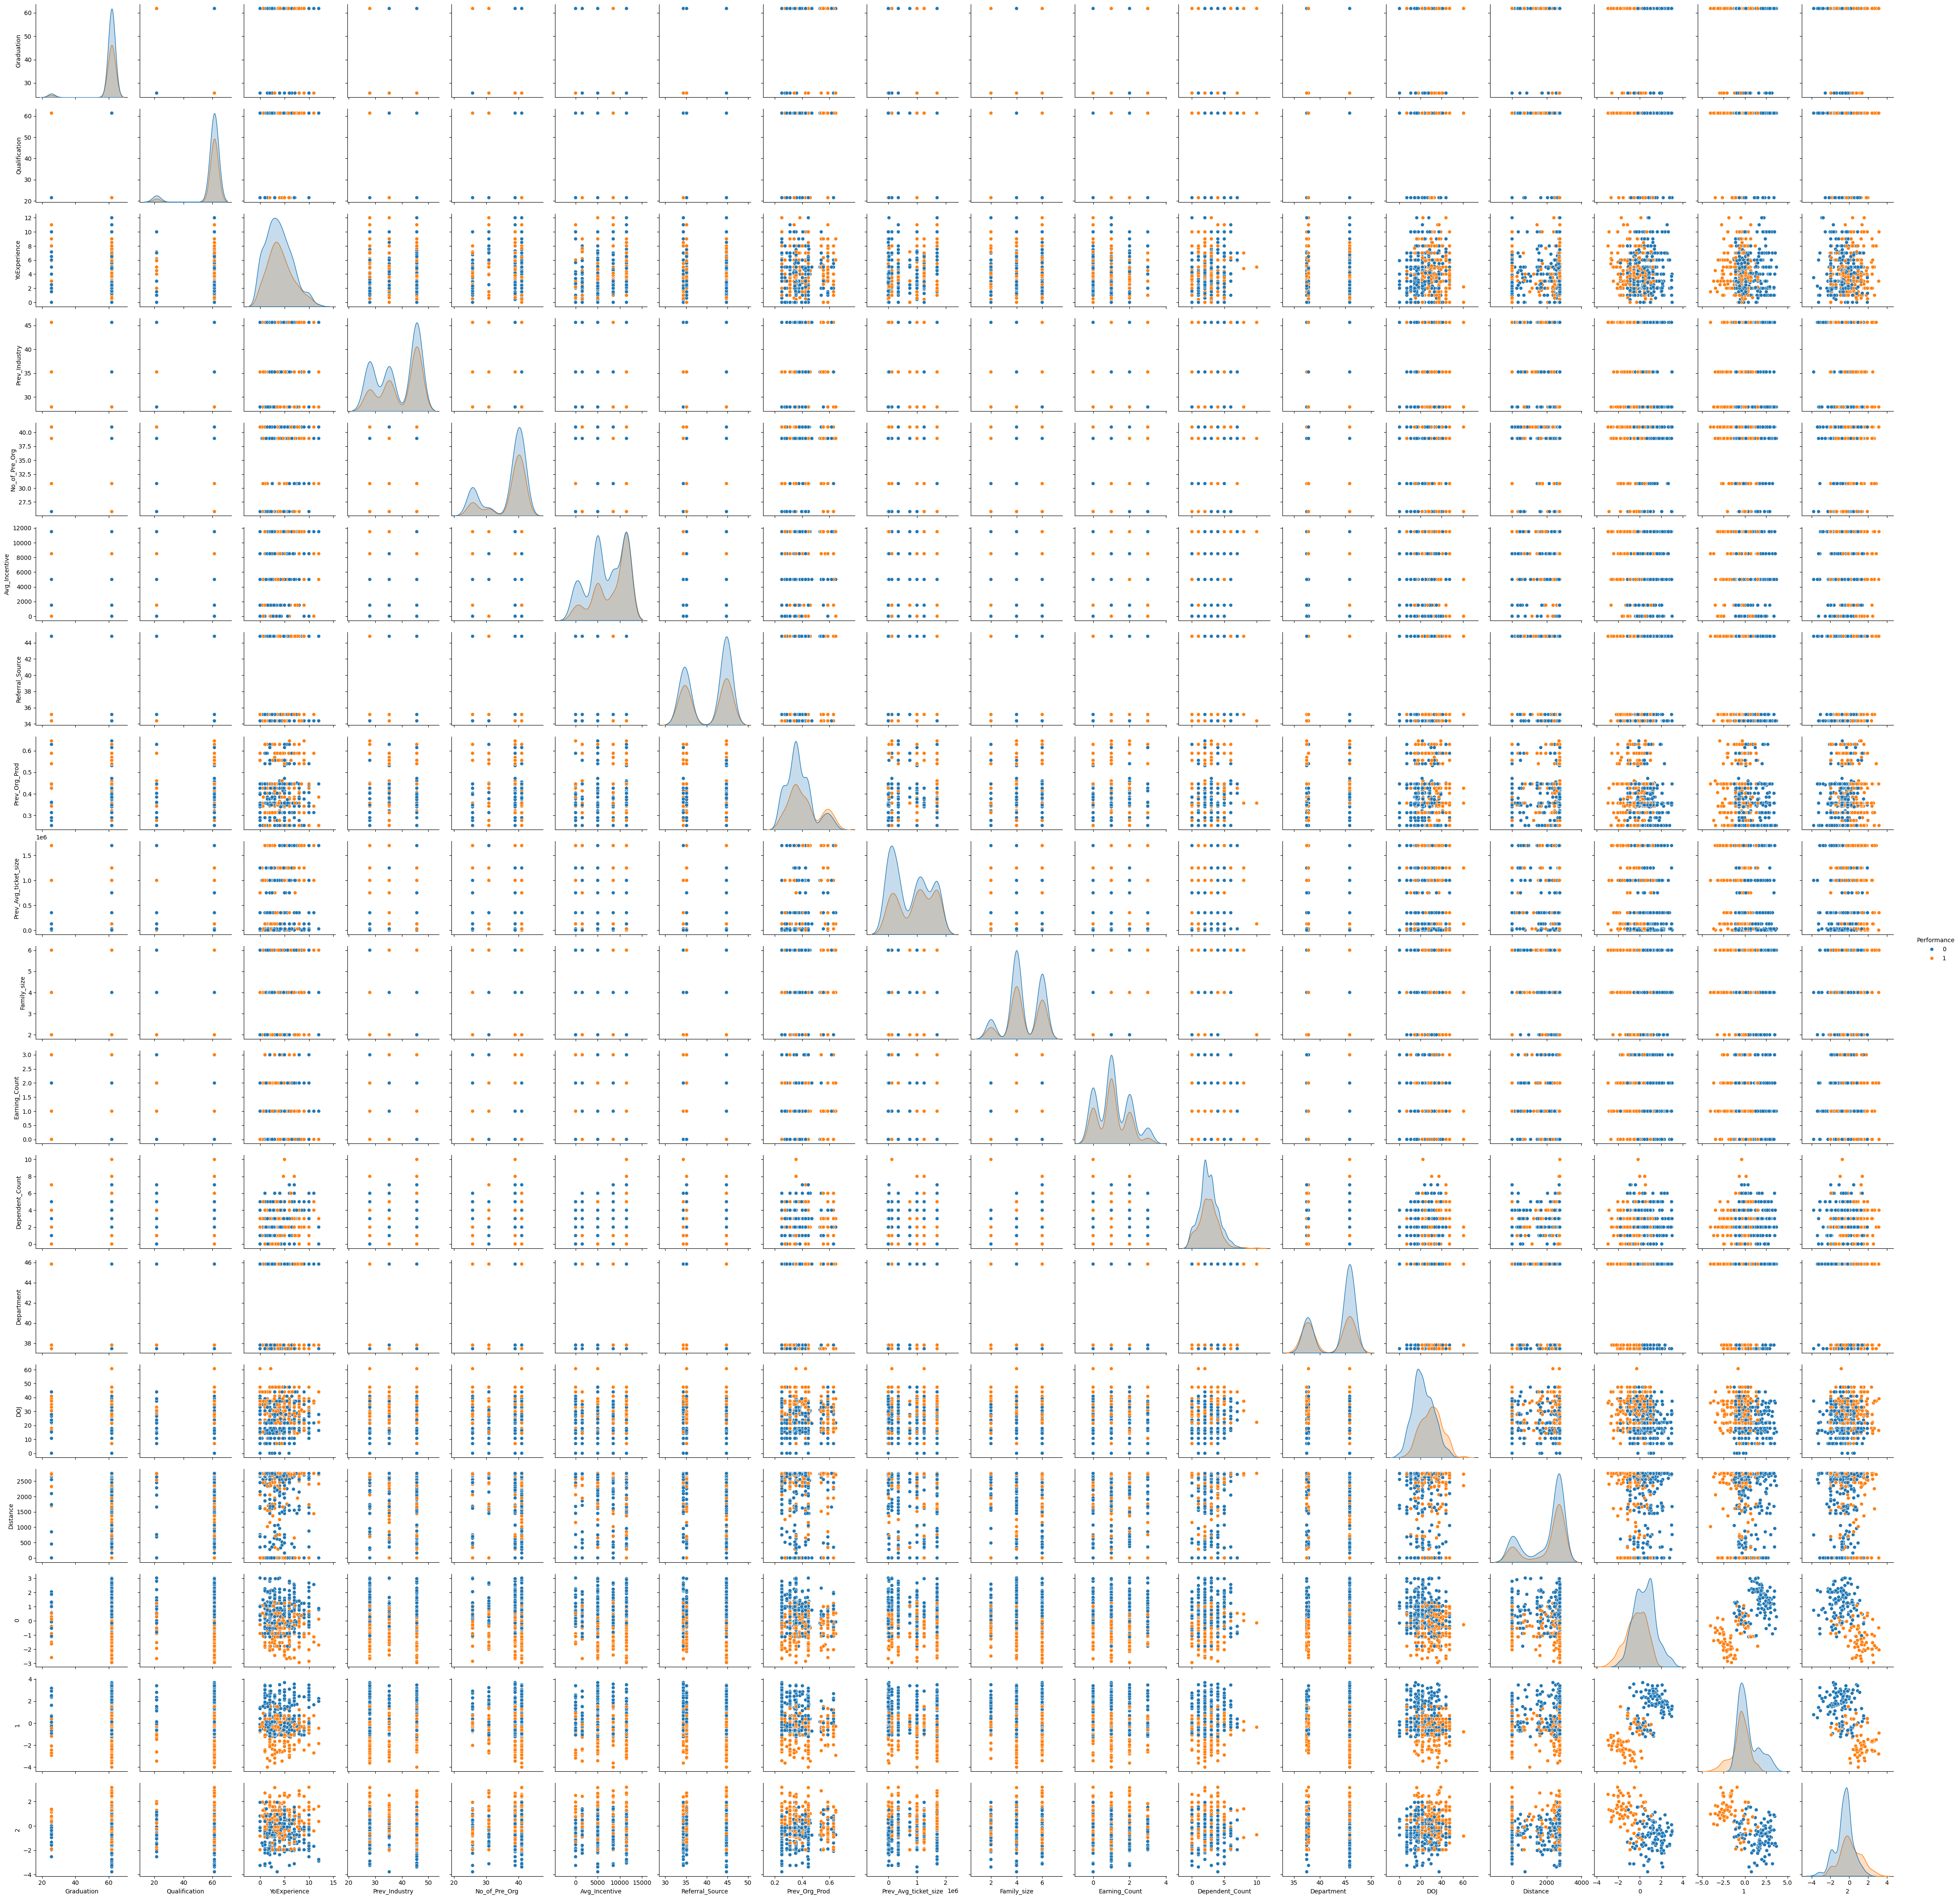

In [221]:
data = pd.concat([dataset_numeric_train[:743],struct_train_df["Performance"] ], axis = 1)

plt.figure(figsize=(12,6))
sns.pairplot( data = data, hue = "Performance")

<Axes: >

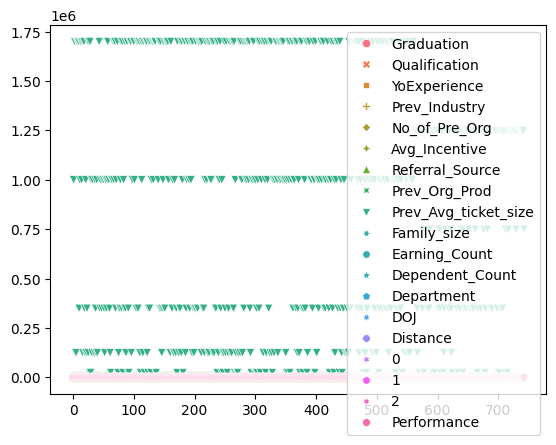

In [222]:
sns.scatterplot( data = data)

In [223]:
data.corr()

Graduation  Qualification  YoExperience  Prev_Industry  \
Graduation              1.000000       0.064408     -0.096872       0.016073   
Qualification           0.064408       1.000000      0.004673       0.015242   
YoExperience           -0.096872       0.004673      1.000000       0.036556   
Prev_Industry           0.016073       0.015242      0.036556       1.000000   
No_of_Pre_Org          -0.034652      -0.036398      0.279884       0.029703   
Avg_Incentive           0.041294      -0.002436      0.227794       0.251139   
Referral_Source         0.002060      -0.007161     -0.038756       0.041647   
Prev_Org_Prod          -0.032792      -0.040664      0.078159       0.234032   
Prev_Avg_ticket_size    0.031898       0.025808      0.169369       0.217976   
Family_size            -0.011455       0.058110     -0.014242       0.009047   
Earning_Count          -0.065480       0.013869     -0.020944      -0.085956   
Dependent_Count        -0.018357      -0.074530      0.097929       0.040899   
Department              0.034224      -0.008373     -0.073077      -0.053697   
DOJ                    -0.040315      -0.021064      0.054022       0.003959   
Distance                0.018991      -0.009096      0.007056       0.010275   
0                       0.036659      -0.053860     -0.151800      -0.101856   
1                      -0.010170       0.008997      0.057994      -0.068431   
2                       0.015371       0.007834      0.010250      -0.005287   
Performance            -0.002373       0.039102      0.065645       0.088704   

                      No_of_Pre_Org  Avg_Incentive  Referral_Source  \
Graduation                -0.034652       0.041294         0.002060   
Qualification             -0.036398      -0.002436        -0.007161   
YoExperience               0.279884       0.227794        -0.038756   
Prev_Industry              0.029703       0.251139         0.041647   
No_of_Pre_Org              1.000000       0.116313        -0.115682   
Avg_Incentive              0.116313       1.000000         0.059999   
Referral_Source           -0.115682       0.059999         1.000000   
Prev_Org_Prod              0.001131       0.164753         0.023056   
Prev_Avg_ticket_size       0.069634       0.287414        -0.005008   
Family_size               -0.014231       0.003879        -0.026375   
Earning_Count              0.137618      -0.041090         0.013633   
Dependent_Count            0.025485       0.051994        -0.064376   
Department                 0.078879      -0.139341        -0.067961   
DOJ                        0.038065       0.066026        -0.164459   
Distance                   0.095277       0.025361        -0.053767   
0                         -0.165724      -0.202969         0.027003   
1                          0.059731      -0.038783        -0.022903   
2                         -0.029671       0.019794         0.068747   
Performance                0.051580       0.181697        -0.060387   

                      Prev_Org_Prod  Prev_Avg_ticket_size  Family_size  \
Graduation                -0.032792              0.031898    -0.011455   
Qualification             -0.040664              0.025808     0.058110   
YoExperience               0.078159              0.169369    -0.014242   
Prev_Industry              0.234032              0.217976     0.009047   
No_of_Pre_Org              0.001131              0.069634    -0.014231   
Avg_Incentive              0.164753              0.287414     0.003879   
Referral_Source            0.023056             -0.005008    -0.026375   
Prev_Org_Prod              1.000000              0.200849    -0.041784   
Prev_Avg_ticket_size       0.200849              1.000000    -0.021749   
Family_size               -0.041784             -0.021749     1.000000   
Earning_Count             -0.110260             -0.058841     0.243971   
Dependent_Count            0.027615              0.026276     0.327708   
Department                -0.365250   

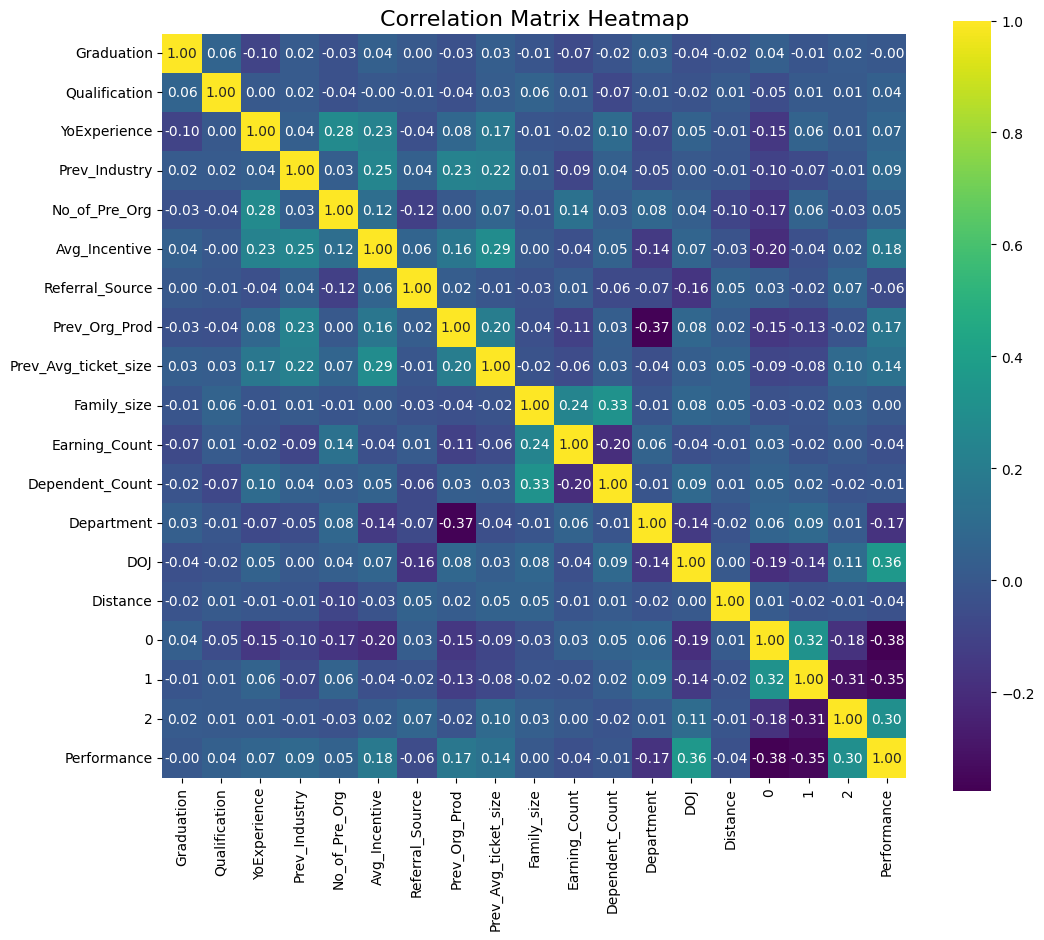

In [111]:
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [113]:
# Apply PCA
# apply hyper parameter tuning 
# try different models compare using visualization 
# k fold crossvalidation on target encoding
# transformation

In [139]:

min_max_transforma_col = [	'Graduation', 'Qualification',	'YoExperience',	'Prev_Industry',	'No_of_Pre_Org',	
                          'Avg_Incentive', 	'Referral_Source',	'Prev_Org_Prod',	'Prev_Avg_ticket_size',	'Family_size',	'Earning_Count',	'Dependent_Count',	'Department',	'DOJ',	'Distance']

In [144]:
dataset_numeric[min_max_transforma_col].head()

Graduation  Qualification  YoExperience  Prev_Industry  No_of_Pre_Org  \
0   61.862369      61.361492           4.0      27.911172      40.955682   
1   61.862369      61.361492           8.0      45.622101      38.908044   
2   61.862369      61.361492           5.0      45.622101      40.955682   
3   61.862369      61.361492           5.5      35.242555      40.955682   
4   61.862369      61.361492           1.0      27.911172      25.783136   

   Avg_Incentive  Referral_Source  Prev_Org_Prod  Prev_Avg_ticket_size  \
0         5000.0        44.799406       0.252874                   0.0   
1         8500.0        44.799406       0.445901             1000000.0   
2        11500.0        34.367438       0.539794             1700000.0   
3         8500.0        35.154594       0.629630             1700000.0   
4            0.0        44.799406       0.356725              125000.0   

   Family_size  Earning_Count  Dependent_Count  Department        DOJ  \
0          4.0              1                2   45.842709  10.772329   
1          6.0              0                4   45.842709  22.266169   
2          4.0              1                4   37.475292  31.173099   
3          2.0              0                2   45.842709  27.854679   
4          4.0              1                1   45.842709  17.855272   

     Distance  
0     0.00001  
1  2755.62501  
2  2755.62501  
3  2252.62501  
4  2755.62501

In [189]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

transform = StandardScaler()

dataset_numeric[min_max_transforma_col]=transform.fit_transform(dataset_numeric[min_max_transforma_col])

In [190]:
dataset_numeric_train = dataset_numeric.drop(['CandidateID', 'Designation','Location_Code',
       'Residential_Pincode', 'Branch_Pincode',  "Prev_Org" 	,'Graduation'] , axis =1)

X = dataset_numeric_train[:743]
y = struct_train_df["Performance"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

model = xgb.train(params, dtrain, num_boost_round=num_round)

# Predict on the test set
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate the accuracy
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the XGBoost model: {accuracy:.4f}")
print(f"F1 Score for the model : {f1}")


# improvement after applying standard scaler

Accuracy of the XGBoost model: 0.8121
F1 Score for the model : 0.7407407407407407


In [1]:
from sklearn.decomposition import PCA


pca = PCA(n_components= 3)
pca.fit(dataset_numeric.drop(['CandidateID', 'Designation','Location_Code',
       'Residential_Pincode', 'Branch_Pincode',  "Prev_Org" , 	'Graduation' ] , axis =1))
x=pca.transform(dataset_numeric.drop(['CandidateID', 'Designation','Location_Code',
       'Residential_Pincode', 'Branch_Pincode',  "Prev_Org" , 	'Graduation' ] , axis =1))
 

NameError: name 'dataset_numeric' is not defined

In [185]:
x

array([[-8.04196483e+05, -1.10181899e+03, -2.11509479e+03],
       [ 1.95807861e+05,  6.80465650e+02,  7.09644082e+02],
       [ 8.95811984e+05,  2.47635499e+03,  7.57540494e+02],
       ...,
       [ 8.95811996e+05,  2.47620099e+03,  5.86535589e+02],
       [ 8.95807018e+05, -5.26082201e+02, -1.99544177e+03],
       [ 1.95813022e+05,  3.68046154e+03,  7.06994304e+02]])

In [186]:
X = x[:743]
y = struct_train_df["Performance"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

model = xgb.train(params, dtrain, num_boost_round=num_round)

# Predict on the test set
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate the accuracy
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the XGBoost model: {accuracy:.4f}")
print(f"F1 Score for the model : {f1}")

Accuracy of the XGBoost model: 0.6040
F1 Score for the model : 0.4778761061946903
